# Quais Fatores Levam ao Cancelamento? Uma An√°lise de Churn em Clientes de Telecomunica√ß√µes

A rotatividade de clientes (churn) √© um desafio cr√≠tico para empresas de telecomunica√ß√µes, resultando em perda de receita e altos custos para adquirir novos clientes. Compreender os motivos que levam um cliente a cancelar o servi√ßo √© o primeiro passo para criar estrat√©gias de reten√ß√£o eficazes.

**Objetivo:** Este projeto tem como objetivo construir um **modelo de machine learning** capaz de **prever quais clientes possuem maior probabilidade de churn**. Para isso, realizaremos uma an√°lise explorat√≥ria detalhada nos dados para identificar os principais perfis e comportamentos associados ao cancelamento. O resultado final n√£o ser√° apenas um modelo preditivo, mas tamb√©m insights valiosos que podem auxiliar a empresa a desenvolver a√ß√µes proativas para aumentar a fidelidade de seus clientes.

O projeto seguir√° as seguintes etapas:  
1.  `Prepara√ß√£o do Ambiente e Carga dos Dados`
2.  `Diagn√≥stico e Prepara√ß√£o dos Dados`
3.  `An√°lise Explorat√≥ria de Dados (EDA)`
4.  `Pr√©-processamento e Engenharia de Features`
5.  `Cria√ß√£o de um Modelo Preditivo de Machine Learning`
6.  `Conclus√£o e Pr√≥ximos Passos`

## 1. Prepara√ß√£o do Ambiente e Carga dos Dados

Para iniciar o projeto, o primeiro passo √© preparar o ambiente de trabalho, importando todas as bibliotecas que ser√£o utilizadas ao longo da an√°lise. Centralizar as importa√ß√µes no in√≠cio do notebook √© uma boa pr√°tica que organiza o c√≥digo e facilita a replica√ß√£o do ambiente.

As principais bibliotecas utilizadas ser√£o:
- **Pandas:** para manipula√ß√£o, limpeza e an√°lise dos dados em formato de DataFrame.
- **Matplotlib e Seaborn:** para a cria√ß√£o de visualiza√ß√µes de dados, ajudando a extrair insights de forma gr√°fica.
- **Statistics:** para c√°lculos estat√≠sticos b√°sicos.
- **IPython.display:** para renderizar elementos ricos, como textos formatados em Markdown, diretamente nas sa√≠das das c√©lulas.

In [3]:
#Importar as bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as sts
from IPython.display import Markdown, display

Carregando o arquivo `WA_Fn-UseC_-Telco-Customer-Churn.csv` para um DataFrame do pandas e exibindo as 5 primeiras linhas para uma inspe√ß√£o inicial.

In [4]:
# --- 1. Carregamento dos Dados ---
caminho_arquivo = '../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv'
dados = pd.read_csv(caminho_arquivo)

# Apenas para confirmar que carregou, podemos dar um .head() simples aqui
dados.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

## 2. Diagn√≥stico e Prepara√ß√£o dos Dados

Com os dados carregados na etapa anterior, iniciamos agora a fase de diagn√≥stico e prepara√ß√£o. O objetivo √© entender a "sa√∫de" do nosso conjunto de dados e realizar os ajustes necess√°rios para garantir sua qualidade e consist√™ncia antes da an√°lise explorat√≥ria.

Esta etapa ser√° dividida nos seguintes passos:
* **Diagn√≥stico R√°pido:** Faremos uma primeira investiga√ß√£o sobre a estrutura, tipos de dados, valores ausentes e estat√≠sticas b√°sicas do dataset.
* **Dicion√°rio de Dados:** Documentaremos o significado de cada coluna para facilitar a an√°lise.
* **Limpeza e Formata√ß√£o:** Com base no diagn√≥stico, corrigiremos problemas como tipos de dados inadequados e trataremos quaisquer valores nulos encontrados.

In [5]:
# --- 2. Diagn√≥stico R√°pido e Inspe√ß√£o Inicial ---

# Exibindo as 5 primeiras linhas para uma vis√£o geral
print("--- Amostra dos Dados (Primeiras 5 Linhas) ---")
display(dados.head())

# Exibindo as 5 √∫ltimas linhas para verificar o final do arquivo
print("\n--- Amostra dos Dados (√öltimas 5 Linhas) ---")
display(dados.tail())

# Verificando as dimens√µes do DataFrame (linhas, colunas)
print("\n--- Dimens√µes do DataFrame (Linhas, Colunas) ---")
print(dados.shape)

# Obtendo um resumo t√©cnico completo (tipos de dados, contagem de nulos, uso de mem√≥ria)
# Este √© o comando mais importante desta etapa.
print("\n--- Resumo T√©cnico do DataFrame ---")
dados.info()

# Obtendo um resumo estat√≠stico das colunas num√©ricas
print("\n--- Resumo Estat√≠stico (Colunas Num√©ricas) ---")
display(dados.describe())


--- Amostra dos Dados (Primeiras 5 Linhas) ---


customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]


--- Amostra dos Dados (√öltimas 5 Linhas) ---


customerID  gender  SeniorCitizen Partner Dependents  tenure  \
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[5 rows x 21 columns]


--- Dimens√µes do DataFrame (Linhas, Colunas) ---
(7043, 21)

--- Resumo T√©cnico do DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   ob

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

### 2.1. Dicion√°rio de Dados

Para facilitar a compreens√£o das vari√°veis presentes em nosso conjunto de dados, esta se√ß√£o servir√° como um dicion√°rio, descrevendo o significado de cada coluna.

---
**Informa√ß√µes Demogr√°ficas dos Clientes:**

* **`gender`**: G√™nero do cliente (Female, Male).
* **`SeniorCitizen`**: Informa se o cliente √© idoso ou n√£o (Originalmente 0 ou 1, depois convertido para 'No' e 'Yes').
* **`Partner`**: Se o cliente possui um parceiro ou parceira (Yes, No).
* **`Dependents`**: Se o cliente possui dependentes financeiros (Yes, No).

**Informa√ß√µes da Conta do Cliente:**

* **`customerID`**: ID √∫nico para identifica√ß√£o de cada cliente.
* **`tenure`**: N√∫mero de meses que o cliente permaneceu na empresa.
* **`Contract`**: Tipo de contrato do cliente (Month-to-month, One year, Two year).
* **`PaperlessBilling`**: Se o cliente recebe a fatura online (Yes, No).
* **`PaymentMethod`**: O m√©todo de pagamento do cliente (ex: Electronic check, Mailed check, etc.).
* **`MonthlyCharges`**: O valor cobrado do cliente mensalmente.
* **`TotalCharges`**: O valor total cobrado do cliente desde o in√≠cio do contrato.

**Informa√ß√µes dos Servi√ßos Contratados:**

* **`PhoneService`**: Se o cliente possui servi√ßo de telefonia (Yes, No).
* **`MultipleLines`**: Se o cliente possui m√∫ltiplas linhas telef√¥nicas (Yes, No, No phone service).
* **`InternetService`**: O tipo de servi√ßo de internet do cliente (DSL, Fiber optic, No).
* **`OnlineSecurity`**: Se o cliente possui o servi√ßo de seguran√ßa online (Yes, No, No internet service).
* **`OnlineBackup`**: Se o cliente possui o servi√ßo de backup online (Yes, No, No internet service).
* **`DeviceProtection`**: Se o cliente possui seguro para seus aparelhos (Yes, No, No internet service).
* **`TechSupport`**: Se o cliente possui suporte t√©cnico especializado (Yes, No, No internet service).
* **`StreamingTV`**: Se o cliente possui o servi√ßo de streaming de TV (Yes, No, No internet service).
* **`StreamingMovies`**: Se o cliente possui o servi√ßo de streaming de filmes (Yes, No, No internet service).

**Vari√°vel Alvo (Target):**

* **`Churn`**: A vari√°vel que queremos prever. Indica se o cliente cancelou o servi√ßo (Yes) ou n√£o (No).

### 2.1. Corre√ß√£o e Padroniza√ß√£o de Tipos de Dados

Nesta etapa, focamos em ajustar as colunas cujos tipos de dados n√£o representavam corretamente a natureza da informa√ß√£o. Um dataset limpo e consistente √© fundamental para qualquer an√°lise ou modelo de machine learning.

#### Coluna `TotalCharges`: de `object` para num√©rico

A an√°lise com `.info()` revelou que a coluna `TotalCharges` estava formatada como `object` (texto), quando na verdade deveria ser um tipo num√©rico para representar os valores de cobran√ßa.

Para resolver isso, convertemos a coluna usando `pd.to_numeric`. O uso do par√¢metro `errors='coerce'` √© essencial aqui, pois ele garante que qualquer entrada que n√£o seja um n√∫mero v√°lido (como um espa√ßo em branco, que indica aus√™ncia de cobran√ßa para novos clientes) seja transformada em `NaN` (Not a Number). Isso nos permite identificar e tratar esses casos espec√≠ficos posteriormente, sem interromper o processo.

#### Coluna `SeniorCitizen`: de `int` para `object` (categ√≥rico)

Observando os dados, notamos que a coluna `SeniorCitizen` usava os valores `0` e `1`. Embora seja um formato num√©rico (`int64`), semanticamente, ela √© uma vari√°vel categ√≥rica, representando "N√£o" e "Sim".

Para tornar o dataset mais intuitivo e consistente com outras colunas bin√°rias (como `Partner` e `Dependents`), decidimos mapear `0` para `'No'` e `1` para `'Yes'`. Essa transforma√ß√£o altera o tipo da coluna para `object` e melhora significativamente a legibilidade dos dados.

In [6]:
# --- Ajuste 1: Convertendo a coluna 'SeniorCitizen' de int para object ---

# Mapeando os valores 0 e 1 para 'No' e 'Yes'
mapeamento_senior = {0: 'No', 1: 'Yes'}
dados['SeniorCitizen'] = dados['SeniorCitizen'].map(mapeamento_senior)


# --- Ajuste 2: Convertendo a coluna 'TotalCharges' de object para num√©rico ---

# Usando pd.to_numeric com 'coerce' para lidar com erros
dados['TotalCharges'] = pd.to_numeric(dados['TotalCharges'], errors='coerce')


# --- Verifica√ß√£o Final ---

# Verificando a contagem de valores nulos que surgiram em 'TotalCharges'
print("Contagem de valores nulos por coluna:")
print(dados.isnull().sum())
print("-" * 40)

# Verificando os novos tipos de dados das colunas alteradas
print("Verifica√ß√£o dos tipos de dados (Dtypes) atualizados:")
dados[['SeniorCitizen', 'TotalCharges']].info()

Contagem de valores nulos por coluna:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64
----------------------------------------
Verifica√ß√£o dos tipos de dados (Dtypes) atualizados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SeniorCitizen  7043 non-null   object 
 1   TotalCharges   7032 non-null   float64
dtypes: float64(1), object(1)
memory usage: 110.2+ KB


### 2.2. Investigando a Origem dos Dados Ausentes

Como resultado da convers√£o, a coluna `TotalCharges` agora possui 11 valores nulos (`NaN`). Antes de tomar qualquer decis√£o, como simplesmente remover essas linhas, preciso investigar a causa raiz desse problema.

Minha principal hip√≥tese √© que esses valores nulos correspondam a clientes novos, que possuem `tenure` (tempo de contrato) igual a 0 e, por isso, ainda n√£o geraram uma cobran√ßa total. Para validar essa suposi√ß√£o, vou filtrar o DataFrame e analisar especificamente essas 11 linhas para confirmar se essa rela√ß√£o √© verdadeira.

In [7]:
# Filtrando o DataFrame para exibir apenas as linhas onde 'TotalCharges' √© nulo
# e confirmando nossa hip√≥tese ao olhar a coluna 'tenure'
clientes_novos = dados[dados['TotalCharges'].isnull()]

print("Clientes com valores ausentes em 'TotalCharges':")
print(clientes_novos[['tenure', 'MonthlyCharges', 'TotalCharges']])

Clientes com valores ausentes em 'TotalCharges':
      tenure  MonthlyCharges  TotalCharges
488        0           52.55           NaN
753        0           20.25           NaN
936        0           80.85           NaN
1082       0           25.75           NaN
1340       0           56.05           NaN
3331       0           19.85           NaN
3826       0           25.35           NaN
4380       0           20.00           NaN
5218       0           19.70           NaN
6670       0           73.35           NaN
6754       0           61.90           NaN


A an√°lise que realizei na etapa anterior confirma minha hip√≥tese: os 11 clientes com `TotalCharges` nulo s√£o, de fato, clientes novos com `tenure` igual a 0.

Com essa confirma√ß√£o, tenho a seguran√ßa para justificar minha decis√£o de **remover essas linhas**, em vez de tentar preench√™-las com algum valor. Minha decis√£o se baseia em dois pontos principais:

1.  **Manter a Integridade dos Dados:** Pela l√≥gica do neg√≥cio, n√£o faria sentido eu imputar um valor de cobran√ßa (como a m√©dia, por exemplo) para um cliente que ainda n√£o completou o primeiro m√™s. Fazer isso criaria um dado artificial e inconsistente que poderia prejudicar a an√°lise.
2.  **Impacto Estat√≠stico M√≠nimo:** Estou lidando com apenas 11 linhas em um universo de mais de 7.000. A exclus√£o de uma amostra t√£o pequena n√£o ir√° distorcer as distribui√ß√µes gerais dos dados nem enfraquecer o desempenho do futuro modelo de machine learning.

Com isso justificado, o pr√≥ximo passo √© aplicar a remo√ß√£o para finalizar a etapa de limpeza.

### 2.3. Aplicando a Limpeza e Finalizando a Prepara√ß√£o

Com minha decis√£o sobre os dados nulos devidamente justificada, agora vou executar a limpeza final no meu DataFrame.

Utilizarei o m√©todo `.dropna()` para remover as 11 linhas problem√°ticas. Logo em seguida, farei uma checagem completa com `.isnull().sum()` e `.info()` para certificar que o conjunto de dados est√° agora √≠ntegro, sem valores ausentes e com os tipos de dados corretos, pronto para a pr√≥xima fase do projeto: a An√°lise Explorat√≥ria.

In [8]:
# Removendo as linhas que cont√™m qualquer valor nulo no DataFrame
# O argumento inplace=True modifica o DataFrame 'dados' diretamente
dados.dropna(inplace=True)

# Verifica√ß√£o final para garantir que n√£o h√° mais valores nulos
print("Verifica√ß√£o de valores nulos ap√≥s a remo√ß√£o:")
print(dados.isnull().sum())

print("\n-------------------------------------------------\n")

# Exibindo as informa√ß√µes do DataFrame para confirmar a nova contagem de entradas
print("Informa√ß√µes finais do DataFrame ap√≥s a limpeza:")
dados.info()

Verifica√ß√£o de valores nulos ap√≥s a remo√ß√£o:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

-------------------------------------------------

Informa√ß√µes finais do DataFrame ap√≥s a limpeza:
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-nul

---
## 3. An√°lise Explorat√≥ria de Dados (EDA)

Com os dados limpos e preparados, iniciamos a fase de An√°lise Explorat√≥ria. O objetivo aqui √© investigar os dados visualmente para descobrir padr√µes, identificar anomalias, testar hip√≥teses e extrair os primeiros insights que guiar√£o a constru√ß√£o do nosso modelo.

Come√ßaremos com a **An√°lise Univariada**, onde cada vari√°vel √© analisada individualmente.

### 3.1. An√°lise Univariada - Vari√°veis Num√©ricas

Vamos come√ßar analisando a distribui√ß√£o das nossas vari√°veis num√©ricas (`tenure`, `MonthlyCharges` e `TotalCharges`). Para isso, utilizaremos:
* **Histogramas:** Para entender a forma da distribui√ß√£o e a frequ√™ncia dos valores.
* **Boxplots:** Para identificar a mediana, os quartis, a dispers√£o e poss√≠veis outliers.

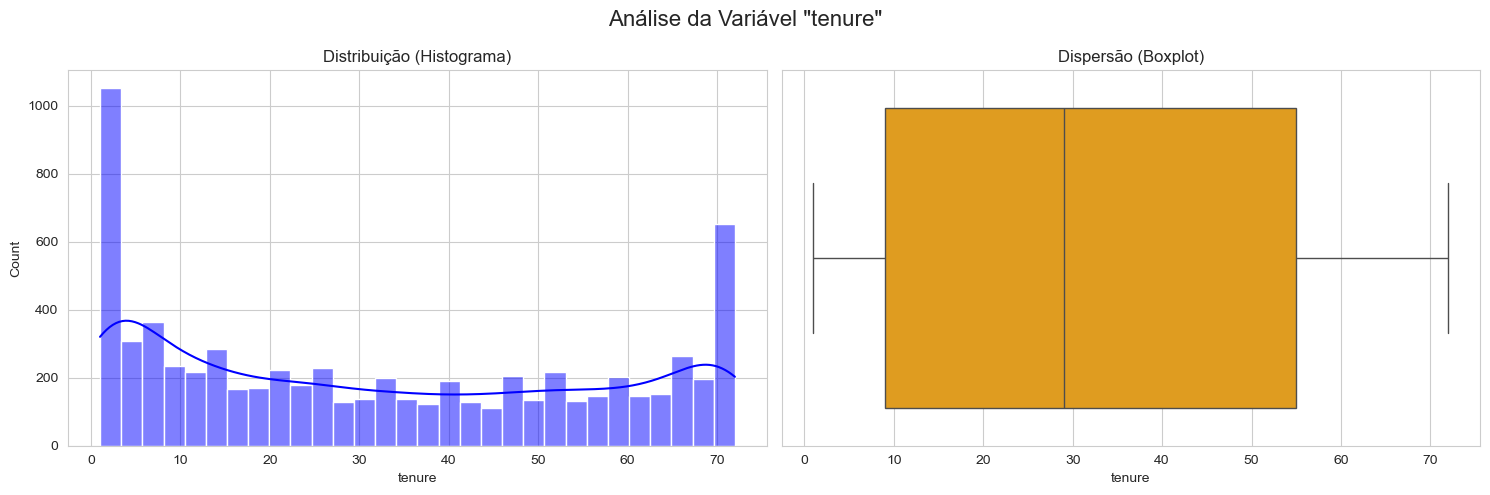


### Vari√°vel `tenure` (Tempo de Contrato)

- **Histograma**:  
  - Muitos clientes est√£o nos primeiros 0‚Äì10 meses.  
  - Tamb√©m existe um grupo de clientes antigos (60‚Äì70 meses).  
  - Mostra que a base √© formada por muita gente nova e poucos clientes bem fi√©is.

- **Boxplot**:  
  - Mediana em ~30 meses (metade tem menos de 2 anos e meio de contrato).  
  - Grande parte fica entre ~10 e ~55 meses.  
  - N√£o aparecem outliers.

- **O que isso pode indicar sobre Churn**:  
  - Clientes novos t√™m mais chance de sair cedo.  
  - Clientes antigos tendem a ser mais est√°veis.

- **Pr√≥ximos passos**:  
  - Comparar `tenure` com `Churn` para ver se clientes mais recentes realmente cancelam mais.  
  - Pensar em estrat√©gias para reter clientes logo nos primeiros meses.



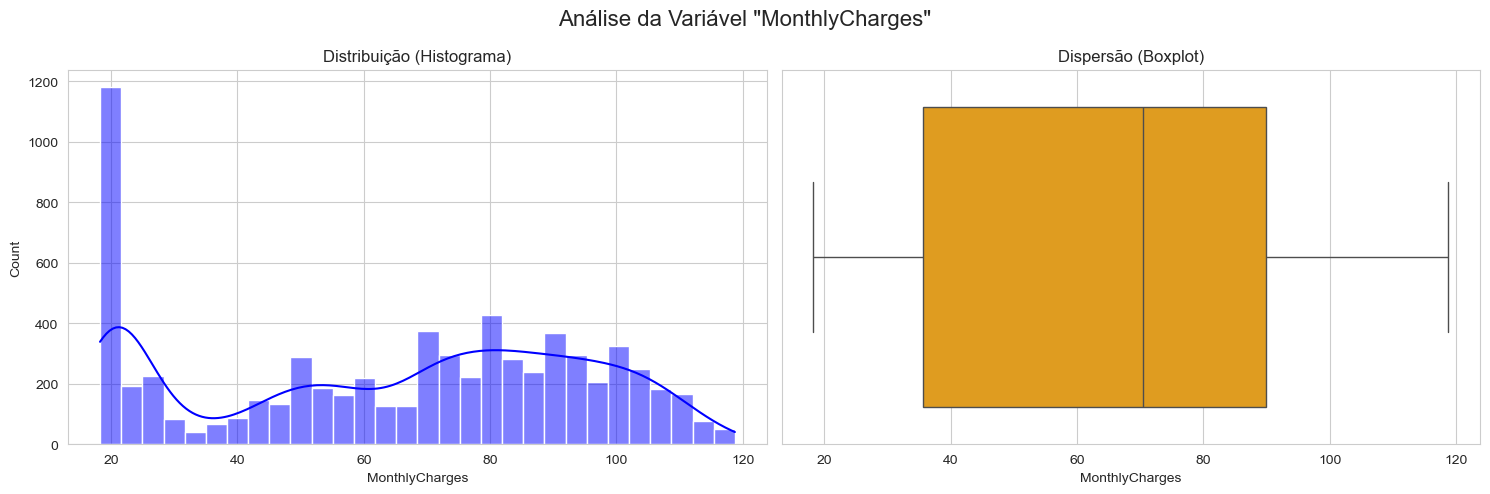


### Vari√°vel `MonthlyCharges` (Gastos Mensais)

- **Histograma**:  
  - Os valores n√£o s√£o distribu√≠dos de forma uniforme, mas sim em ‚Äúfaixas‚Äù.  
  - H√° um grupo grande pagando em torno de 20 (planos b√°sicos) e outro em torno de 70‚Äì80 (planos mais caros).  
  - Depois de 80 os clientes v√£o diminuindo.

- **Boxplot**:  
  - Mediana perto de 70.  
  - Metade dos clientes paga entre ~35 e ~90.  
  - N√£o aparecem outliers, mas existe uma cauda de valores mais altos.

- **O que isso pode indicar sobre Churn**:  
  - Quem paga mais caro pode estar mais propenso a cancelar (custo alto).  
  - Clientes de planos baratos tendem a ser mais est√°veis.

- **Pr√≥ximos passos**:  
  - Comparar `MonthlyCharges` com `Churn`.  
  - Ver se os picos nos valores est√£o ligados a tipos de plano espec√≠ficos (ex.: fibra vs DSL).



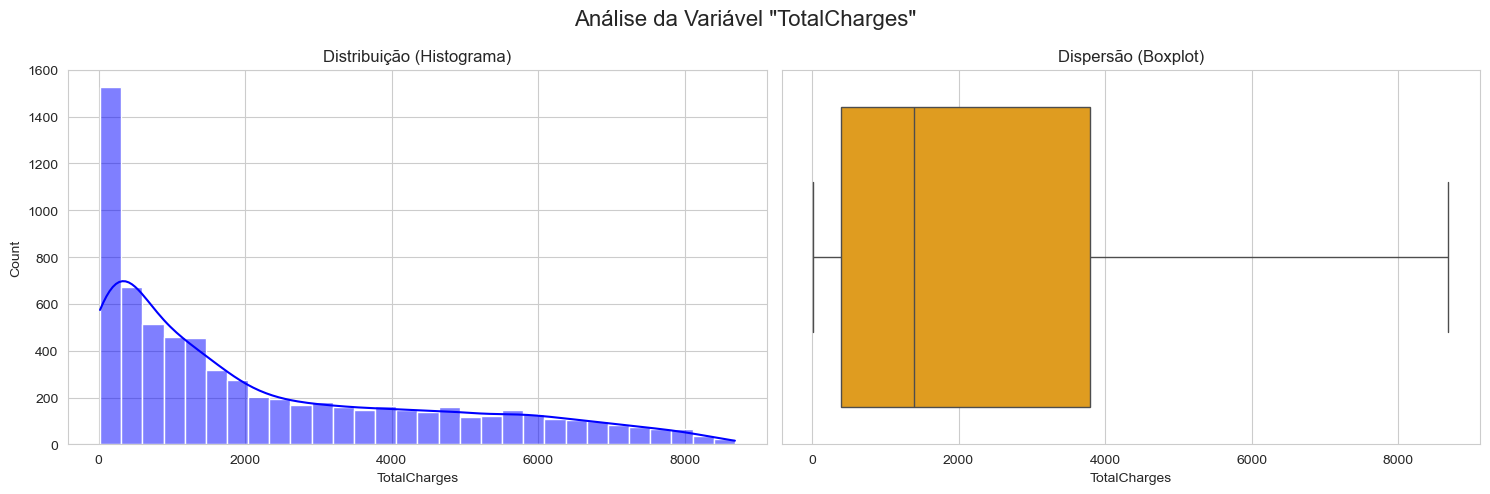


### Vari√°vel `TotalCharges` (Gastos Totais)

- **Histograma**:  
  - A maioria dos clientes gastou pouco (at√© 2000).  
  - Existe um grande pico entre 0 e 500, o que faz sentido para clientes novos.  
  - Poucos chegam a valores altos (at√© 8000).

- **Boxplot**:  
  - Mediana em torno de 1500‚Äì1800.  
  - Metade dos clientes gasta entre ~400 e ~4000.  
  - N√£o aparecem outliers, mas a distribui√ß√£o √© puxada para valores baixos.

- **O que isso pode indicar sobre Churn**:  
  - Clientes com gasto total baixo provavelmente s√£o novos e saem cedo.  
  - Clientes que ficam mais tempo acumulam valores maiores, mas s√£o minoria.

- **Pr√≥ximos passos**:  
  - Comparar `TotalCharges` com `tenure` e `Churn` (ex.: scatterplot).  
  - Verificar se valores iguais a 0 s√£o casos reais ou poss√≠veis erros no dado.



In [67]:

# Estilo visual com grade clara ao fundo
sns.set_style('whitegrid')

# Seleciona automaticamente todas as colunas com tipos num√©ricos (int64 e float64)
# O .columns no final garante que estamos pegando apenas a lista de nomes das colunas para o loop
colunas_numericas = dados.select_dtypes(include=['int64', 'float64']).columns

# Dicion√°rio com insights pr√©-definidos para cada coluna
insights = {
    'tenure': """
### Vari√°vel `tenure` (Tempo de Contrato)

- **Histograma**:  
  - Muitos clientes est√£o nos primeiros 0‚Äì10 meses.  
  - Tamb√©m existe um grupo de clientes antigos (60‚Äì70 meses).  
  - Mostra que a base √© formada por muita gente nova e poucos clientes bem fi√©is.

- **Boxplot**:  
  - Mediana em ~30 meses (metade tem menos de 2 anos e meio de contrato).  
  - Grande parte fica entre ~10 e ~55 meses.  
  - N√£o aparecem outliers.

- **O que isso pode indicar sobre Churn**:  
  - Clientes novos t√™m mais chance de sair cedo.  
  - Clientes antigos tendem a ser mais est√°veis.

- **Pr√≥ximos passos**:  
  - Comparar `tenure` com `Churn` para ver se clientes mais recentes realmente cancelam mais.  
  - Pensar em estrat√©gias para reter clientes logo nos primeiros meses.

""",

    'MonthlyCharges': """
### Vari√°vel `MonthlyCharges` (Gastos Mensais)

- **Histograma**:  
  - Os valores n√£o s√£o distribu√≠dos de forma uniforme, mas sim em ‚Äúfaixas‚Äù.  
  - H√° um grupo grande pagando em torno de 20 (planos b√°sicos) e outro em torno de 70‚Äì80 (planos mais caros).  
  - Depois de 80 os clientes v√£o diminuindo.

- **Boxplot**:  
  - Mediana perto de 70.  
  - Metade dos clientes paga entre ~35 e ~90.  
  - N√£o aparecem outliers, mas existe uma cauda de valores mais altos.

- **O que isso pode indicar sobre Churn**:  
  - Quem paga mais caro pode estar mais propenso a cancelar (custo alto).  
  - Clientes de planos baratos tendem a ser mais est√°veis.

- **Pr√≥ximos passos**:  
  - Comparar `MonthlyCharges` com `Churn`.  
  - Ver se os picos nos valores est√£o ligados a tipos de plano espec√≠ficos (ex.: fibra vs DSL).

""",

    'TotalCharges': """
### Vari√°vel `TotalCharges` (Gastos Totais)

- **Histograma**:  
  - A maioria dos clientes gastou pouco (at√© 2000).  
  - Existe um grande pico entre 0 e 500, o que faz sentido para clientes novos.  
  - Poucos chegam a valores altos (at√© 8000).

- **Boxplot**:  
  - Mediana em torno de 1500‚Äì1800.  
  - Metade dos clientes gasta entre ~400 e ~4000.  
  - N√£o aparecem outliers, mas a distribui√ß√£o √© puxada para valores baixos.

- **O que isso pode indicar sobre Churn**:  
  - Clientes com gasto total baixo provavelmente s√£o novos e saem cedo.  
  - Clientes que ficam mais tempo acumulam valores maiores, mas s√£o minoria.

- **Pr√≥ximos passos**:  
  - Comparar `TotalCharges` com `tenure` e `Churn` (ex.: scatterplot).  
  - Verificar se valores iguais a 0 s√£o casos reais ou poss√≠veis erros no dado.

"""
}

# Loop para gerar gr√°ficos e exibir insights
for coluna in colunas_numericas:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle(f'An√°lise da Vari√°vel "{coluna}"', fontsize=16)

    # Histograma (distribui√ß√£o) com curva de densidade
    sns.histplot(data=dados, x=coluna, kde=True, ax=axes[0], color='blue', bins=30)
    axes[0].set_title('Distribui√ß√£o (Histograma)')

    # Boxplot (dispers√£o, mediana, quartis, outliers)
    sns.boxplot(data=dados, x=coluna, ax=axes[1], color='orange')
    axes[1].set_title('Dispers√£o (Boxplot)')

    plt.tight_layout()
    plt.show()

    # Exibe o Markdown correspondente √† coluna
    display(Markdown(insights[coluna]))
    print( "\n " + '='*80)

### 3.2. An√°lise Univariada - Vari√°veis Categ√≥ricas

Agora, vamos analisar as vari√°veis categ√≥ricas para entender a frequ√™ncia e a distribui√ß√£o de suas categorias. Utilizaremos **gr√°ficos de barras (countplots)** para visualizar a contagem de clientes em cada categoria, o que nos ajudar√° a identificar perfis predominantes na base de clientes.

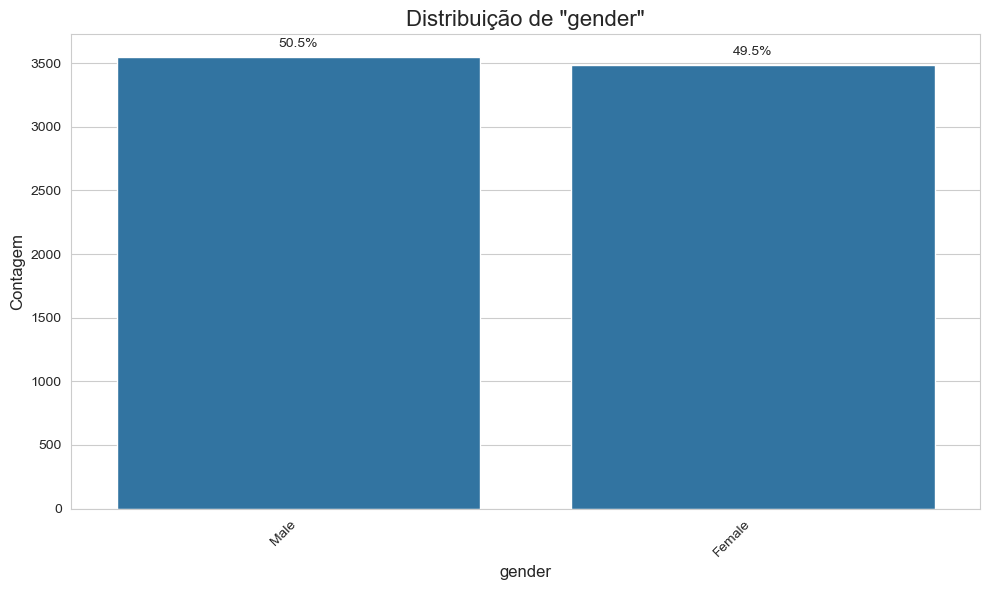


### Vari√°vel `gender` ‚Äî G√™nero do cliente (`Male`, `Female`).
- **Distribui√ß√£o**: A distribui√ß√£o de g√™nero est√° bastante equilibrada, com **50,5% de clientes do sexo masculino** e **49,5% do sexo feminino**.
- **Insight**: Esse equil√≠brio indica que **n√£o h√° vi√©s de g√™nero relevante** na base de clientes, o que √© positivo para an√°lises comparativas e modelagem preditiva, pois reduz o risco de distor√ß√µes. Ainda assim, √© interessante verificar se existem **diferen√ßas sutis no comportamento de churn ou nas prefer√™ncias de servi√ßos** entre os g√™neros.
- **Pr√≥ximos Passos**: Analisar a taxa de churn por `gender` para identificar poss√≠veis diferen√ßas. Cruzar com outras vari√°veis como `tenure` (tempo de contrato) e `InternetService` para detectar intera√ß√µes relevantes entre g√™nero e comportamento de uso ou cancelamento.


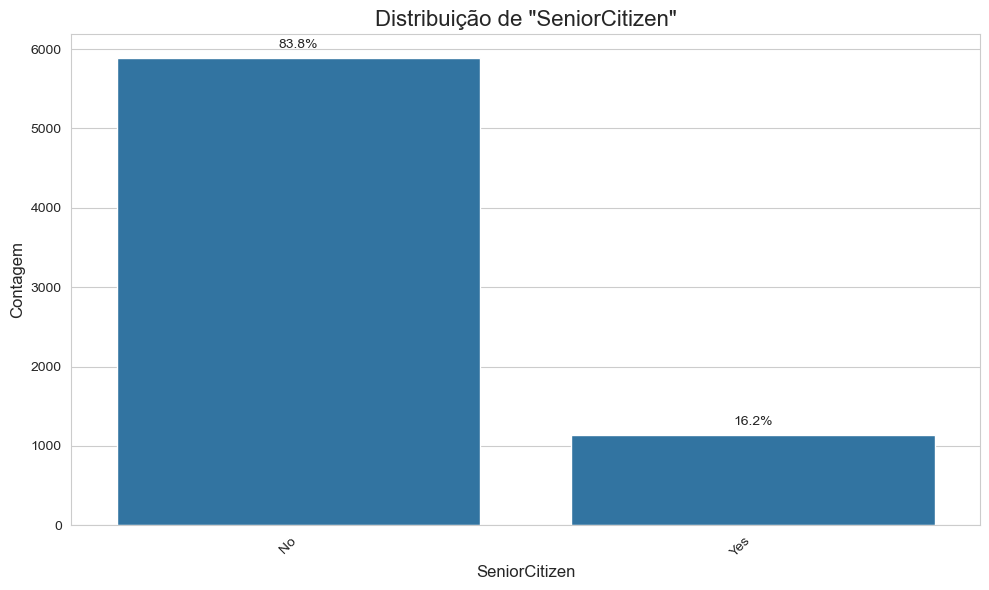


### Vari√°vel `SeniorCitizen` ‚Äî Indica se o cliente √© idoso (`Yes`) ou n√£o (`No`).
- **Distribui√ß√£o**: A maioria dos clientes **n√£o √© idosa** ‚Äî **83,8% est√£o marcados como `No`**, enquanto apenas **16,2% s√£o identificados como idosos (`Yes`)**.
- **Insight**: A distribui√ß√£o mostra um claro desbalanceamento, indicando que o servi√ßo √© mais utilizado por clientes mais jovens ou de meia-idade. Esse fator pode influenciar na taxa de churn se houver diferen√ßas de comportamento entre esses dois p√∫blicos.
- **Pr√≥ximos Passos**: Analisar a taxa de churn por `SeniorCitizen` para verificar se os clientes idosos (`Yes`) apresentam maior tend√™ncia ao cancelamento, possivelmente por raz√µes como custo, complexidade no uso ou menor ader√™ncia ao servi√ßo digital.


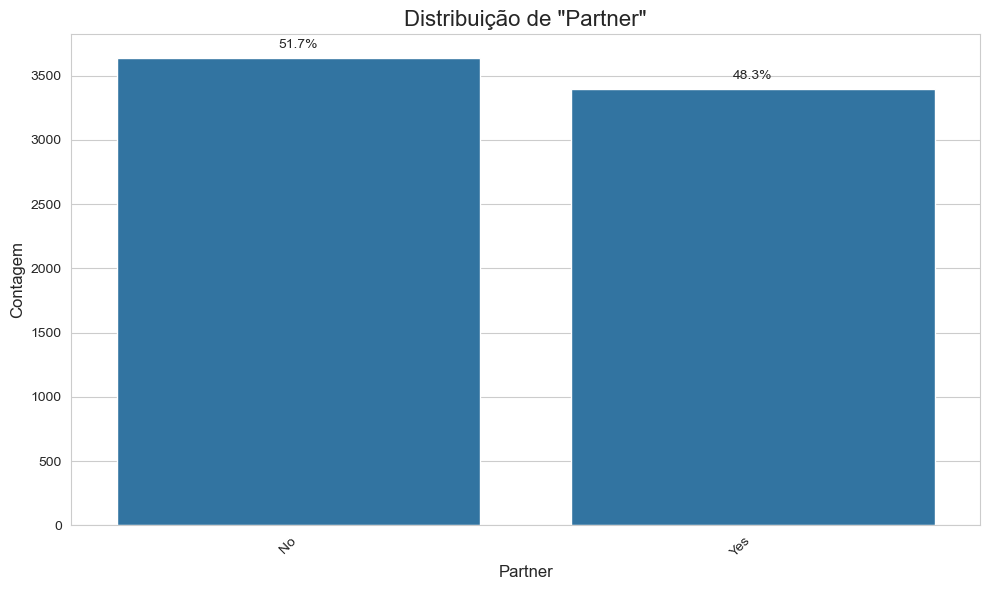


### Vari√°vel `Partner` ‚Äî Indica se o cliente possui parceiro ou parceira (`Yes` ou `No`)
- **Distribui√ß√£o**: A distribui√ß√£o est√° relativamente equilibrada: **51,7% dos clientes n√£o possuem parceiro(a)** (`No`) e **48,3% possuem** (`Yes`).
- **Insight**: Esse equil√≠brio indica que a vari√°vel `Partner` **n√£o apresenta vi√©s amostral significativo**, o que √© positivo para an√°lises comparativas. Isso permite avaliar de forma mais justa se a presen√ßa de um parceiro influencia no comportamento do cliente.
- **Pr√≥ximos Passos**: Analisar a taxa de churn por `Partner` para verificar se a presen√ßa de parceiro(a) est√° associada a maior reten√ß√£o ou maior propens√£o ao cancelamento.


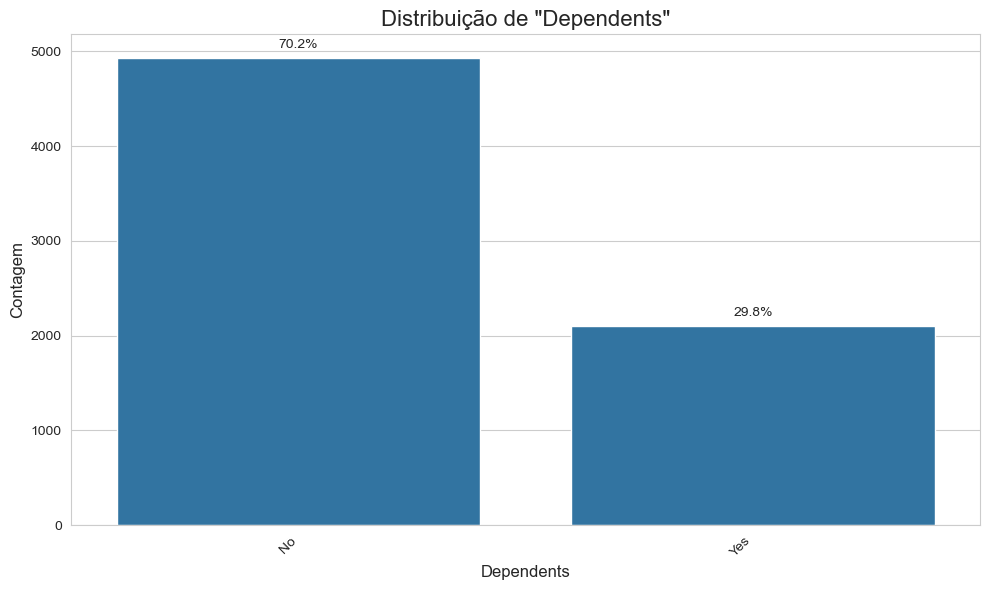


### Vari√°vel `Dependents` ‚Äî Indica se o cliente possui dependentes (`Yes` ou `No`)
- **Distribui√ß√£o**: A maioria dos clientes **n√£o possui dependentes** ‚Äî **70,2% responderam `No`**, enquanto **29,8% possuem (`Yes`)**.
- **Insight**: H√° um desequil√≠brio relevante, indicando que o servi√ßo √© mais utilizado por clientes sem dependentes. Isso pode refletir uma **falta de adequa√ß√£o dos servi√ßos √†s necessidades de clientes com filhos ou familiares sob cuidado**, o que pode impactar negativamente a reten√ß√£o desse p√∫blico.
- **Pr√≥ximos Passos**: Analisar a taxa de churn por `Dependents` para verificar se h√° maior propens√£o ao cancelamento entre clientes com dependentes. Tamb√©m pode ser √∫til cruzar com vari√°veis como `Partner` e `Contract` para investigar perfis familiares mais amplos.


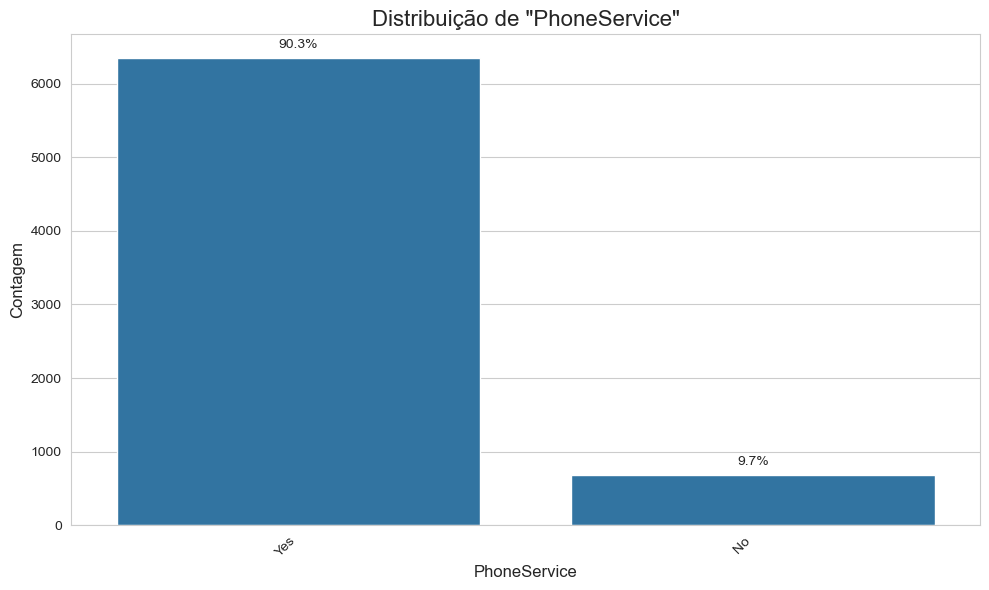


### Vari√°vel `PhoneService` ‚Äî Indica se o cliente possui servi√ßo de telefone (`Yes`, `No`).
- **Distribui√ß√£o**: A maioria dos clientes **possui o servi√ßo de telefone** ‚Äî **90,3% responderam `Yes`**, enquanto apenas **9,7% disseram `No`**. Isso sugere que o servi√ßo √© amplamente contratado, possivelmente por estar inclu√≠do por padr√£o em muitos planos da empresa.
- **Insight**: A baixa propor√ß√£o de clientes sem `PhoneService` limita a compara√ß√£o entre os grupos. No entanto, o fato de quase todos os clientes utilizarem esse servi√ßo pode indicar que ele √© considerado **essencial ou parte de pacotes combinados**. Ainda assim, √© importante avaliar se os clientes que optam por n√£o contrat√°-lo apresentam padr√µes diferentes de churn.
- **Pr√≥ximos Passos**:
  - Analisar a taxa de churn por `PhoneService` para verificar se a presen√ßa ou aus√™ncia do servi√ßo est√° relacionada ao cancelamento.
  - Cruzar com a vari√°vel `MultipleLines`, que depende diretamente da exist√™ncia do servi√ßo telef√¥nico, para entender melhor a complexidade do plano e seu impacto na evas√£o.


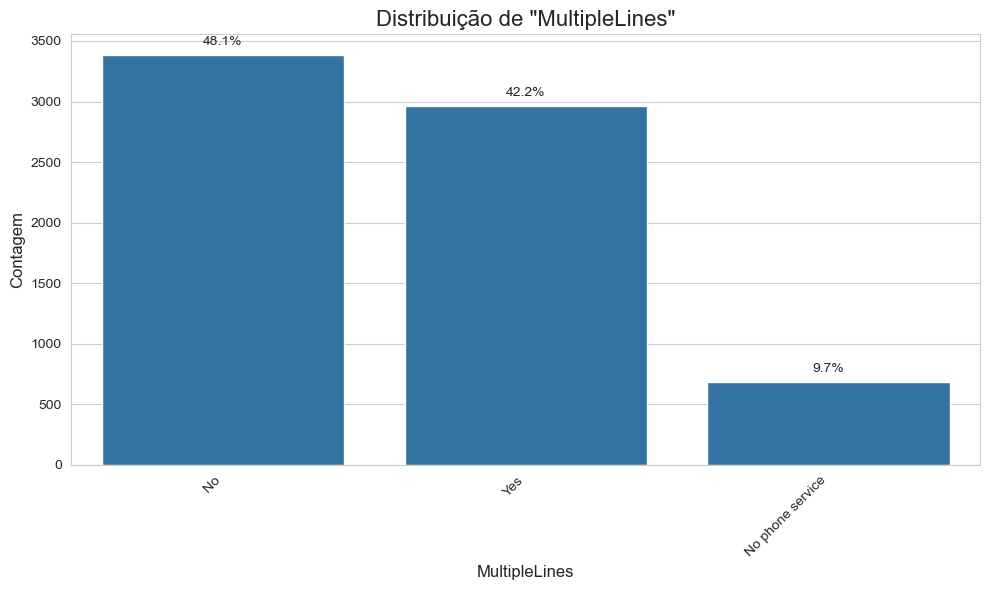


### Vari√°vel `MultipleLines` ‚Äî Indica se o cliente possui m√∫ltiplas linhas telef√¥nicas (`Yes`, `No`, `No phone service`)
- **Distribui√ß√£o**:
  - **48,1%** dos clientes possuem apenas uma linha (`No`)
  - **42,2%** possuem m√∫ltiplas linhas (`Yes`)
  - **9,7%** n√£o possuem servi√ßo de telefone (`No phone service`), o que √© consistente com a vari√°vel `PhoneService`.
- **Insight**: A divis√£o entre clientes com e sem m√∫ltiplas linhas √© relativamente equilibrada entre os usu√°rios de telefone. A categoria "No phone service" mostra que essa vari√°vel s√≥ √© aplic√°vel a quem possui `PhoneService = Yes`, portanto deve ser considerada com cuidado nas an√°lises, evitando compara√ß√µes indevidas. √â poss√≠vel que clientes com m√∫ltiplas linhas estejam mais integrados aos servi√ßos da empresa, o que **poderia influenciar positivamente a reten√ß√£o**, mas isso precisa ser testado.
- **Pr√≥ximos Passos**:
  - Analisar a taxa de churn por `MultipleLines`, **excluindo ou separando** os clientes com `No phone service` para evitar distor√ß√µes.
  - Cruzar com `PhoneService` e `Contract` para entender se m√∫ltiplas linhas est√£o associadas a contratos mais longos ou a perfis de maior engajamento.


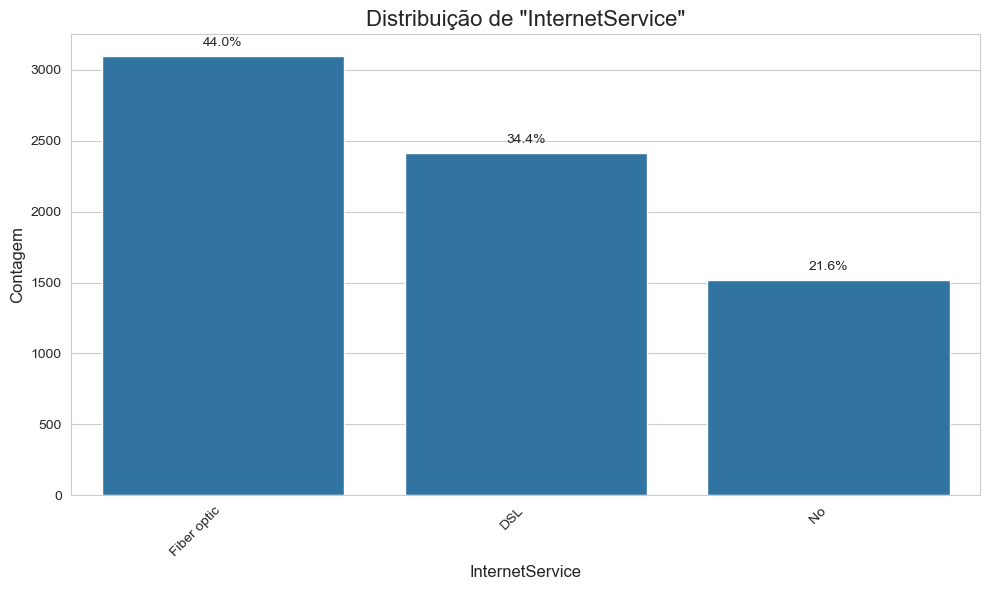


### Vari√°vel `InternetService` ‚Äî Tipo de servi√ßo de internet contratado (`DSL`, `Fiber optic`, `No`)
- **Distribui√ß√£o**:
  - **44,0%** dos clientes utilizam **fibra √≥ptica**,
  - **34,4%** usam **DSL**,
  - **21,6%** **n√£o possuem servi√ßo de internet**.
- **Insight**: A fibra √≥ptica √© o tipo de conex√£o mais popular, o que pode refletir a prefer√™ncia por servi√ßos de maior desempenho. A presen√ßa significativa de clientes sem internet (mais de 1 em cada 5) pode indicar ades√£o a planos b√°sicos, desatualizados ou com menor valor agregado ‚Äî o que representa tanto um risco de churn quanto uma oportunidade de upsell.
- **Pr√≥ximos Passos**:
  - Analisar a taxa de churn por `InternetService` para entender o impacto da aus√™ncia ou tipo de internet no comportamento de cancelamento.
  - Explorar o cruzamento com vari√°veis como `OnlineSecurity`, `StreamingTV` e `Contract` para detectar perfis com maior ou menor risco de evas√£o.


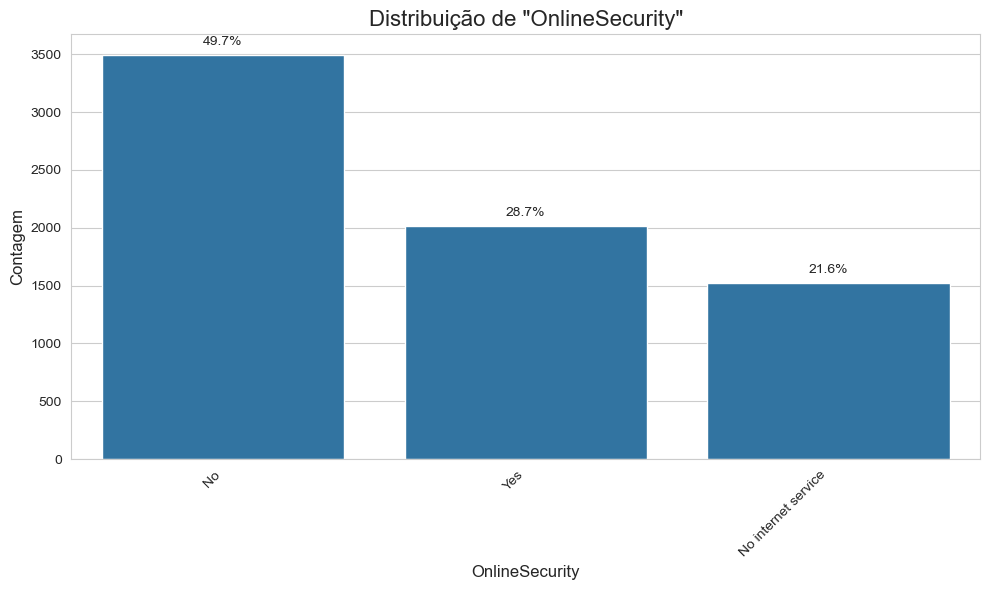


### Vari√°vel `OnlineSecurity` ‚Äî Indica se o cliente possui servi√ßo de seguran√ßa online (`Yes`, `No`, `No internet service`)
- **Distribui√ß√£o**:
  - **49,7%** dos clientes que possuem internet **n√£o contrataram o servi√ßo de seguran√ßa online** (`No`).
  - **28,7%** possuem o servi√ßo (`Yes`).
  - **21,6%** **n√£o possuem servi√ßo de internet**, e portanto, esse servi√ßo n√£o se aplica (`No internet service`).
- **Insight**: Quase metade dos clientes com internet opta por **n√£o contratar seguran√ßa online**, o que pode indicar uma percep√ß√£o de baixo valor, falta de conhecimento sobre o servi√ßo, ou prefer√™ncia por solu√ß√µes externas. A propor√ß√£o de clientes com o servi√ßo tamb√©m √© significativa, e pode representar um grupo mais consciente em termos de prote√ß√£o digital. J√° os clientes com `"No internet service"` devem ser tratados √† parte nas an√°lises, pois o servi√ßo n√£o √© aplic√°vel a eles.
- **Pr√≥ximos Passos**:
  - Analisar a taxa de churn apenas entre os clientes com servi√ßo de internet, comparando quem **tem ou n√£o OnlineSecurity**.
  - Cruzar com outras vari√°veis como `TechSupport`, `InternetService` e `Contract` para entender se existe um perfil mais propenso a contratar esse tipo de servi√ßo (ex: clientes com contratos mais longos, maior idade ou gasto mensal).
  - Avaliar se a presen√ßa do `OnlineSecurity` contribui para a **reten√ß√£o de clientes**.


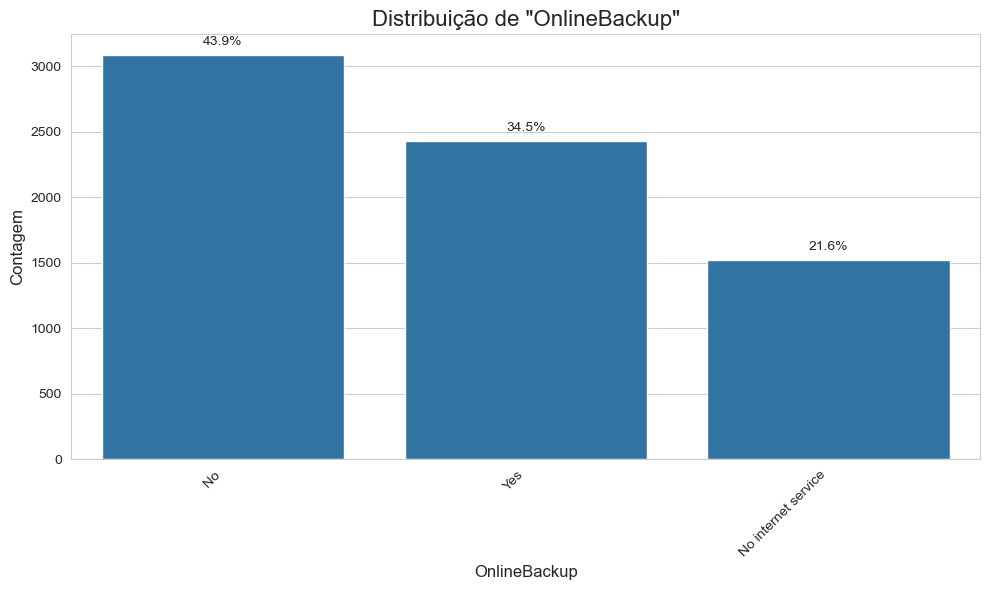


### Vari√°vel `OnlineBackup` ‚Äî Indica se o cliente possui servi√ßo de backup online (`Yes`, `No`, `No internet service`)
- **Distribui√ß√£o**:
  - **43,9%** dos clientes com internet **n√£o utilizam o servi√ßo de backup online** (`No`)
  - **34,5%** utilizam o servi√ßo (`Yes`)
  - **21,6%** n√£o possuem internet, portanto a vari√°vel n√£o se aplica a eles (`No internet service`)
- **Insight**: A maioria dos clientes com acesso √† internet opta por **n√£o contratar o servi√ßo de backup online**, o que pode indicar **baixa percep√ß√£o de valor**, **concorr√™ncia com servi√ßos externos** (como Google Drive ou iCloud), ou **falta de informa√ß√£o**. Por outro lado, o n√∫mero significativo de clientes que usam o servi√ßo pode representar um grupo com maior v√≠nculo digital ‚Äî e potencialmente mais fiel.
- **Pr√≥ximos Passos**:
  - Avaliar a **taxa de churn entre os grupos `Yes` e `No`**, excluindo os clientes com `No internet service`.
  - Investigar a rela√ß√£o com outras vari√°veis como `Contract` e `MonthlyCharges` para entender se o servi√ßo est√° associado a planos mais completos ou caros.
  - Verificar se oferecer ou destacar o `OnlineBackup` pode influenciar positivamente a reten√ß√£o de clientes.


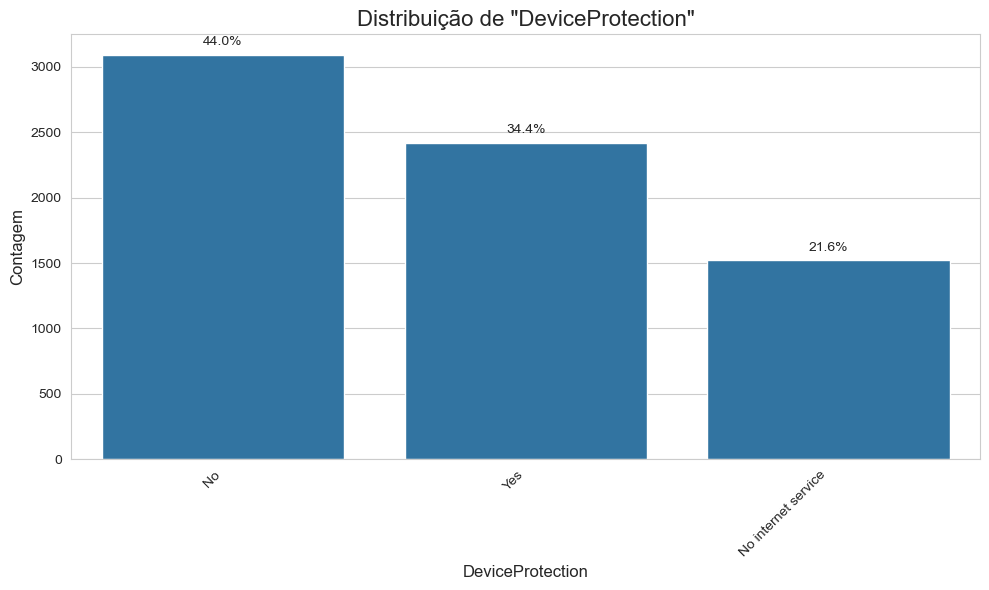


### Vari√°vel `DeviceProtection` ‚Äî Indica se o cliente possui prote√ß√£o para dispositivos (`Yes`, `No`, `No internet service`)
- **Distribui√ß√£o**:
  - **44,0%** dos clientes com internet **n√£o contrataram o servi√ßo de prote√ß√£o de dispositivos** (`No`);
  - **34,4%** possuem o servi√ßo (`Yes`);
  - **21,6%** **n√£o t√™m servi√ßo de internet**, portanto o servi√ßo n√£o se aplica (`No internet service`).
- **Insight**: A maioria dos clientes com internet opta por **n√£o contratar** prote√ß√£o de dispositivos. Isso pode sugerir **baixo valor percebido** nesse servi√ßo ou desconhecimento sobre sua utilidade. Como esse tipo de prote√ß√£o pode ser visto como algo secund√°rio, √© poss√≠vel que **sua contrata√ß√£o esteja associada a clientes com maior engajamento ou planos mais completos** ‚Äî o que pode influenciar na reten√ß√£o.
- **Pr√≥ximos Passos**:
  - Verificar a taxa de churn entre os clientes com e sem `DeviceProtection`, excluindo os que n√£o t√™m internet.
  - Cruzar com vari√°veis como `Contract`, `MonthlyCharges` e `OnlineSecurity` para entender se a contrata√ß√£o da prote√ß√£o faz parte de um pacote mais robusto.


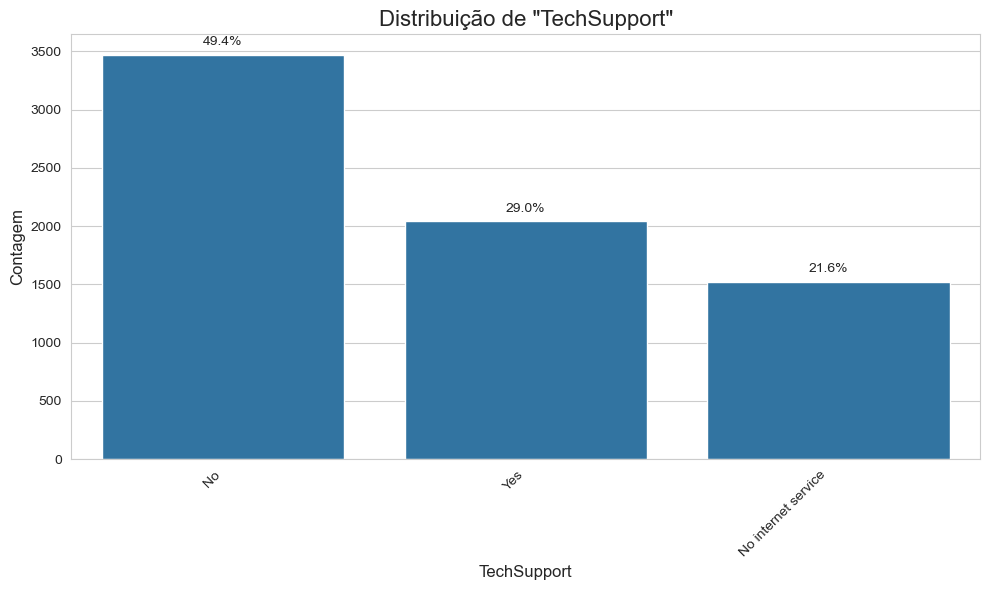


### Vari√°vel `TechSupport` ‚Äî Indica se o cliente possui suporte t√©cnico online (`Yes`, `No`, `No internet service`)
- **Distribui√ß√£o**:
  - **49,4%** dos clientes com internet **n√£o contrataram suporte t√©cnico** (`No`);
  - **29,0%** possuem suporte t√©cnico (`Yes`);
  - **21,6%** **n√£o possuem servi√ßo de internet**, portanto essa vari√°vel n√£o se aplica (`No internet service`).
- **Insight**: A maior parte dos clientes com internet **n√£o utiliza suporte t√©cnico**, o que pode indicar **baixa percep√ß√£o de valor** ou **autonomia tecnol√≥gica** por parte do usu√°rio. No entanto, a aus√™ncia de suporte pode estar relacionada a **maior frustra√ß√£o quando problemas ocorrem**, o que, em alguns perfis de clientes, **pode aumentar a probabilidade de churn**. J√° os que contratam suporte podem representar um grupo com maior depend√™ncia dos servi√ßos e maior valor agregado.
- **Pr√≥ximos Passos**:
  - Avaliar a taxa de churn por `TechSupport`, focando apenas nos clientes com internet.
  - Cruzar com `OnlineSecurity`, `Contract` e `InternetService` para entender se o suporte t√©cnico √© parte de pacotes mais robustos e como isso afeta a reten√ß√£o.


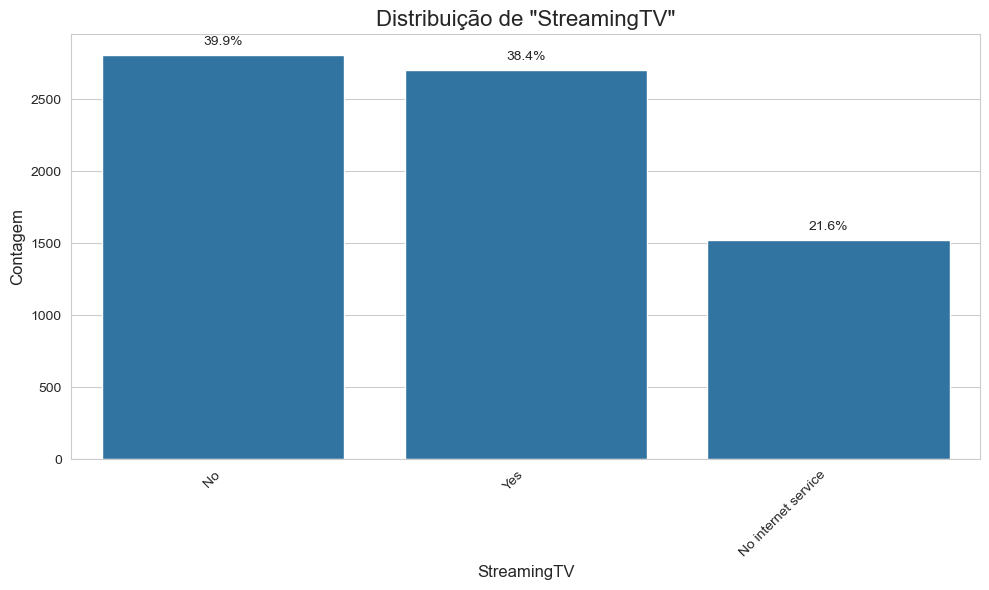


### Vari√°vel `StreamingTV` ‚Äî Indica se o cliente possui servi√ßo de TV via streaming contratado (`Yes`, `No`, `No internet service`)
- **Distribui√ß√£o**:
  - **39,9%** dos clientes com internet **n√£o possuem o servi√ßo de streaming de TV** (`No`);
  - **38,4%** contrataram o servi√ßo (`Yes`);
  - **21,6%** **n√£o possuem servi√ßo de internet**, portanto o servi√ßo n√£o se aplica (`No internet service`).
- **Insight**: A distribui√ß√£o entre clientes com e sem `StreamingTV` √© relativamente equilibrada. Isso pode indicar que o servi√ßo n√£o √© um diferencial decisivo por si s√≥, mas tamb√©m pode refletir **diversidade de perfis de uso**: alguns clientes podem preferir servi√ßos de terceiros (ex: Netflix), enquanto outros podem valorizar o pacote da operadora. A real contribui√ß√£o do `StreamingTV` para a reten√ß√£o pode aparecer em **an√°lises cruzadas com churn e perfil de consumo**.
- **Pr√≥ximos Passos**:
  - Avaliar a taxa de churn por `StreamingTV`, filtrando apenas os clientes com internet.
  - Cruzar com `StreamingMovies`, `Contract` e `MonthlyCharges` para entender se a presen√ßa de servi√ßos de entretenimento est√° associada a planos mais completos ou maior fideliza√ß√£o.


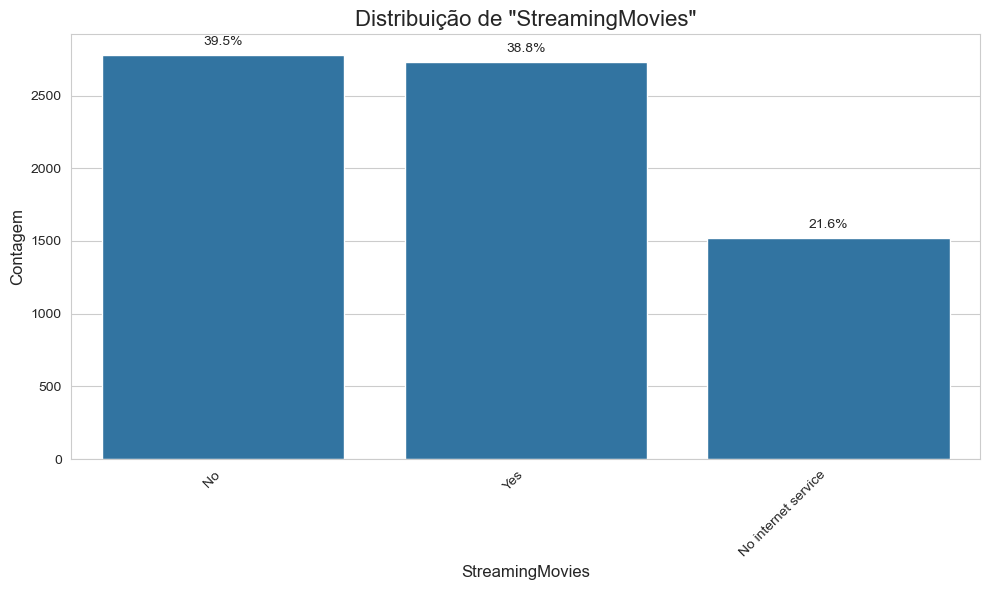


### Vari√°vel `StreamingMovies` ‚Äî Indica se o cliente possui servi√ßo de filmes por streaming contratado (`Yes`, `No`, `No internet service`)
- **Distribui√ß√£o**:
  - **39,5%** dos clientes com internet **n√£o possuem o servi√ßo de streaming de filmes** (`No`);
  - **38,8%** contrataram o servi√ßo (`Yes`);
  - **21,6%** **n√£o possuem servi√ßo de internet**, portanto o servi√ßo n√£o se aplica (`No internet service`).
- **Insight**: A distribui√ß√£o √© bastante equilibrada entre clientes com e sem o servi√ßo, o que sugere que o `StreamingMovies` **n√£o √© um fator decisivo isolado** na escolha do plano. √â poss√≠vel que clientes que n√£o utilizam o servi√ßo prefiram alternativas externas (como Netflix, Prime Video, etc.), ou simplesmente n√£o vejam valor agregado nessa funcionalidade. J√° os que optam por contrat√°-lo podem estar associados a **perfis mais engajados ou com maior uso de servi√ßos complementares**.
- **Pr√≥ximos Passos**:
  - Verificar a taxa de churn por `StreamingMovies`, focando apenas em clientes com internet.
  - Cruzar com `StreamingTV`, `Contract` e `MonthlyCharges` para entender se o pacote de entretenimento est√° ligado √† maior fideliza√ß√£o ou percep√ß√£o de valor.


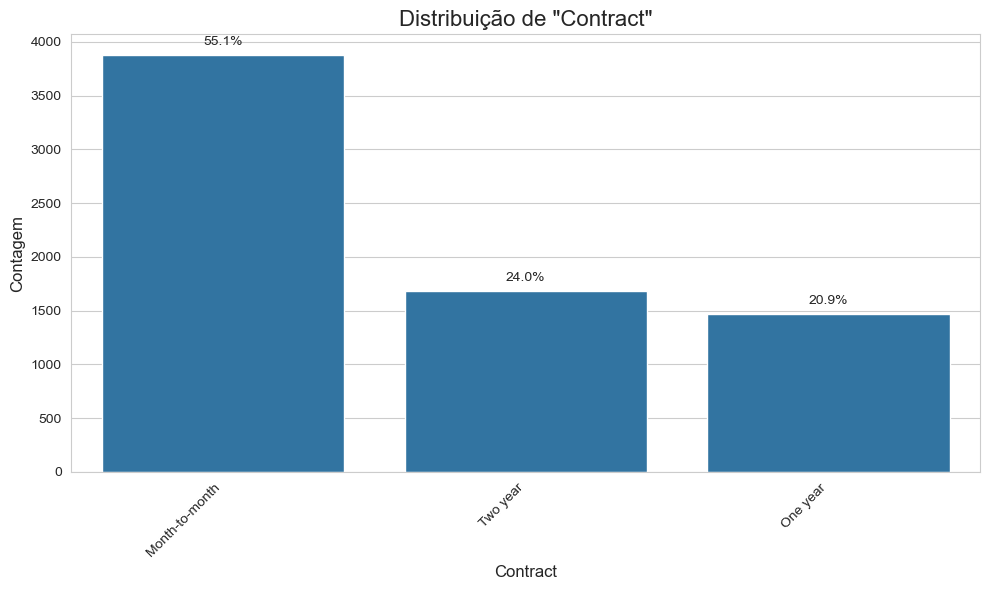


### Vari√°vel `Contract` ‚Äî Tipo de contrato do cliente (`Month-to-month`, `One year`, `Two year`)
- **Distribui√ß√£o**:
  - A maioria dos clientes (**55,1%**) possui contratos do tipo **‚ÄúMonth-to-month‚Äù**;
  - **24,0%** t√™m contrato de **‚ÄúTwo year‚Äù**;
  - **20,9%** possuem contrato de **‚ÄúOne year‚Äù**.
- **Insight**: A predomin√¢ncia de contratos mensais pode estar associada a uma **maior flexibilidade**, mas tamb√©m pode **aumentar a taxa de churn**, j√° que esses clientes n√£o enfrentam barreiras contratuais para o cancelamento. Por outro lado, contratos anuais ou bienais tendem a estar relacionados a **maior fideliza√ß√£o**, seja por incentivo de pre√ßo ou por compromissos contratuais.
- **Pr√≥ximos Passos**:
  - Avaliar a taxa de churn por tipo de `Contract` para identificar se a dura√ß√£o do contrato est√° relacionada √† reten√ß√£o de clientes.
  - Cruzar com vari√°veis como `PaymentMethod` e `PaperlessBilling` para entender o perfil dos clientes que optam por contratos mais longos.


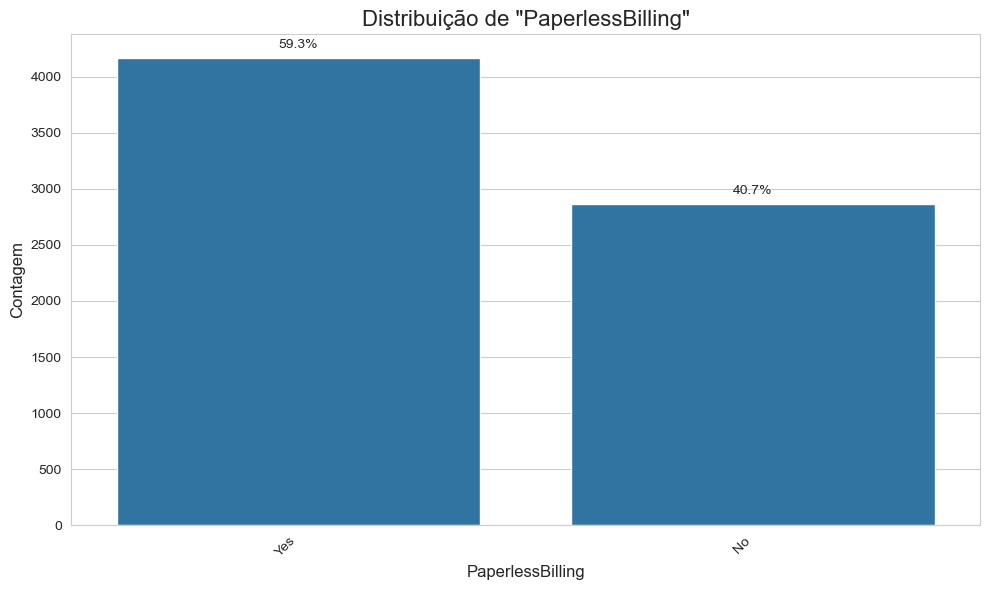


### Vari√°vel `PaperlessBilling` ‚Äî Indica se o cliente optou por fatura digital (sem papel) (`Yes`, `No`)
- **Distribui√ß√£o**:
  - **59,3%** dos clientes optam por receber **fatura digital** (`Yes`);
  - **40,7%** ainda recebem **fatura em papel** (`No`).
- **Insight**: A maioria dos clientes j√° aderiu √† fatura digital, o que pode indicar uma **tend√™ncia √† digitaliza√ß√£o e uso de canais online**. No entanto, ainda h√° uma parcela significativa que prefere m√©todos mais tradicionais. √â poss√≠vel que clientes com fatura digital tenham **maior propens√£o ao autoatendimento**, e que esse grupo tamb√©m esteja mais presente em contratos mensais ‚Äî o que **pode influenciar no churn**.
- **Pr√≥ximos Passos**:
  - Avaliar a taxa de churn por `PaperlessBilling`, verificando se h√° diferen√ßa significativa entre os grupos.
  - Cruzar com vari√°veis como `PaymentMethod` e `Contract` para entender se a fatura digital est√° associada a perfis com maior ou menor fideliza√ß√£o.


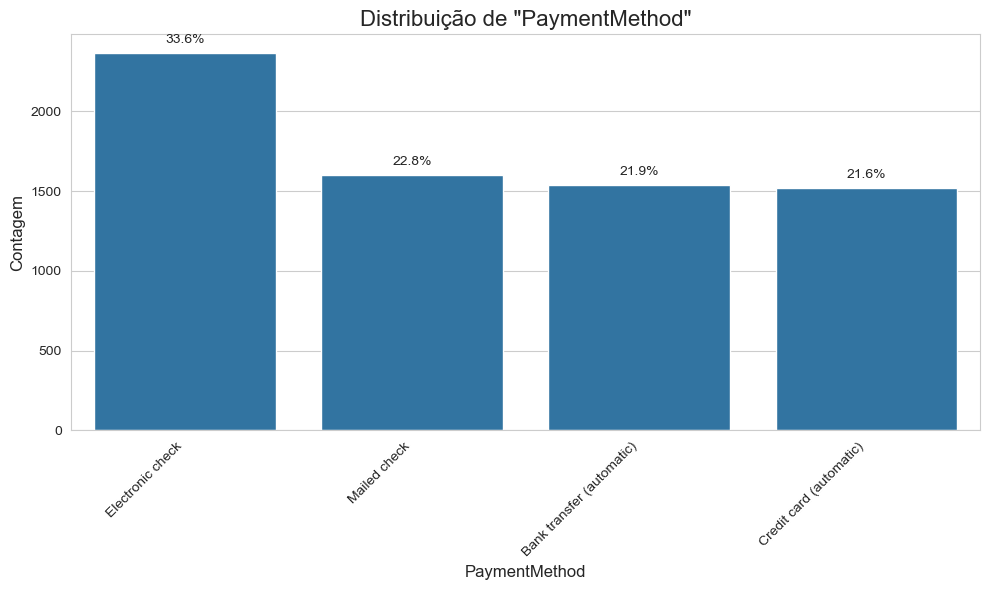


### Vari√°vel `PaymentMethod` ‚Äî M√©todo de pagamento utilizado pelo cliente
- **Distribui√ß√£o**:
  - **33,6%** dos clientes utilizam **Electronic check**;
  - **22,8%** usam **Mailed check**;
  - **21,9%** pagam via **Bank transfer (automatic)**;
  - **21,6%** utilizam **Credit card (automatic)**.
- **Insight**: O m√©todo **Electronic check** √© o mais comum entre os clientes, mas sua predomin√¢ncia pode estar associada √† **maior flexibilidade ou menor engajamento**, j√° que ele n√£o envolve automatiza√ß√£o. Em an√°lises de churn, √© comum que clientes que usam **pagamentos autom√°ticos** (cart√£o de cr√©dito ou d√©bito em conta) apresentem **menor propens√£o ao cancelamento**, enquanto m√©todos como `Electronic check` ou `Mailed check` podem indicar **menor v√≠nculo com a empresa**.
- **Pr√≥ximos Passos**:
  - Avaliar a taxa de churn por `PaymentMethod` para identificar quais m√©todos est√£o mais associados ao cancelamento.
  - Cruzar com `PaperlessBilling` e `Contract` para entender padr√µes de comportamento por perfil de pagamento.


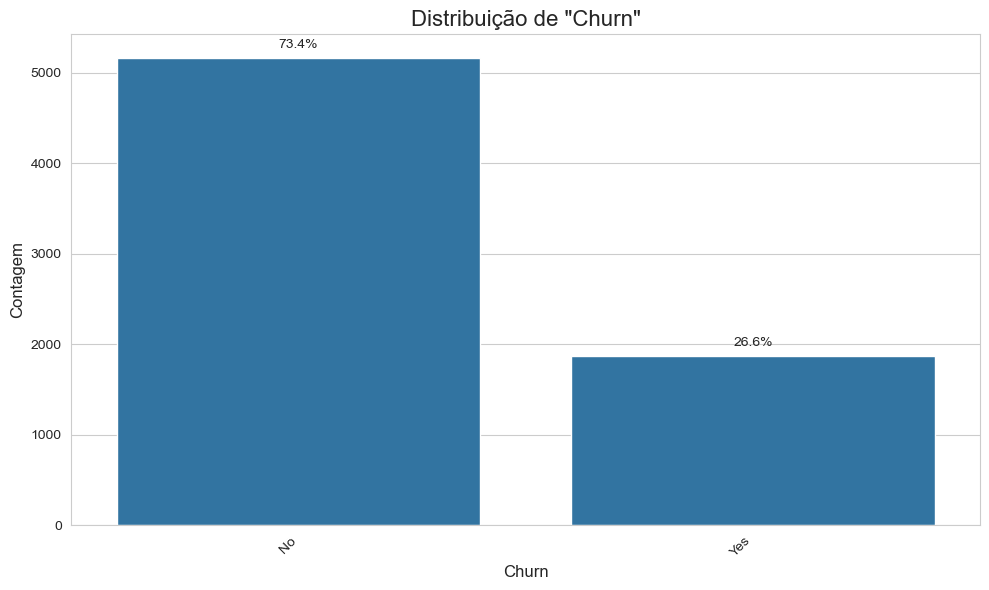


### Vari√°vel `Churn` ‚Äî Indica se o cliente cancelou o servi√ßo (`Yes`) ou permaneceu (`No`)
- **Distribui√ß√£o**:
  - **73,4%** dos clientes **n√£o cancelaram** o servi√ßo (`No`);
  - **26,6%** dos clientes **realizaram o cancelamento** (`Yes`).
- **Insight**: A base apresenta um desbalanceamento moderado, com cerca de **1 a cada 4 clientes cancelando** seus contratos. Essa propor√ß√£o √© relevante o suficiente para permitir uma an√°lise robusta, mas tamb√©m exige aten√ß√£o em modelagens (ex: aplicar t√©cnicas para tratar desbalanceamento de classes, como resampling ou m√©tricas ajustadas). Esse percentual de churn √© consistente com o que se espera em neg√≥cios com modelos de assinatura.
- **Pr√≥ximos Passos**:
  - Explorar correla√ß√µes entre `Churn` e as demais vari√°veis para identificar os principais fatores associados ao cancelamento.
  - Gerar an√°lises bivariadas (ex: churn por tipo de contrato, m√©todo de pagamento, uso de servi√ßos).
  - Considerar a cria√ß√£o de um modelo preditivo para antecipar quais clientes est√£o mais propensos a churn.


In [44]:
# --- Colunas categ√≥ricas (object/category) ---
colunas_categoricas = dados.select_dtypes(include=['object', 'category']).columns.tolist()

# (Opcional) Remover colunas de ID ou de alta cardinalidade que poluem os gr√°ficos
for col_remove in ['customerID', 'id', 'ID']:
    if col_remove in colunas_categoricas:
        colunas_categoricas.remove(col_remove)

# --- Dicion√°rio de insights (igual ao seu, s√≥ certificado de que est√° bem formatado) ---
insights = {
     'gender': """
### Vari√°vel `gender` ‚Äî G√™nero do cliente (`Male`, `Female`).
- **Distribui√ß√£o**: A distribui√ß√£o de g√™nero est√° bastante equilibrada, com **50,5% de clientes do sexo masculino** e **49,5% do sexo feminino**.
- **Insight**: Esse equil√≠brio indica que **n√£o h√° vi√©s de g√™nero relevante** na base de clientes, o que √© positivo para an√°lises comparativas e modelagem preditiva, pois reduz o risco de distor√ß√µes. Ainda assim, √© interessante verificar se existem **diferen√ßas sutis no comportamento de churn ou nas prefer√™ncias de servi√ßos** entre os g√™neros.
- **Pr√≥ximos Passos**: Analisar a taxa de churn por `gender` para identificar poss√≠veis diferen√ßas. Cruzar com outras vari√°veis como `tenure` (tempo de contrato) e `InternetService` para detectar intera√ß√µes relevantes entre g√™nero e comportamento de uso ou cancelamento.
""",

    
    'SeniorCitizen': """
### Vari√°vel `SeniorCitizen` ‚Äî Indica se o cliente √© idoso (`Yes`) ou n√£o (`No`).
- **Distribui√ß√£o**: A maioria dos clientes **n√£o √© idosa** ‚Äî **83,8% est√£o marcados como `No`**, enquanto apenas **16,2% s√£o identificados como idosos (`Yes`)**.
- **Insight**: A distribui√ß√£o mostra um claro desbalanceamento, indicando que o servi√ßo √© mais utilizado por clientes mais jovens ou de meia-idade. Esse fator pode influenciar na taxa de churn se houver diferen√ßas de comportamento entre esses dois p√∫blicos.
- **Pr√≥ximos Passos**: Analisar a taxa de churn por `SeniorCitizen` para verificar se os clientes idosos (`Yes`) apresentam maior tend√™ncia ao cancelamento, possivelmente por raz√µes como custo, complexidade no uso ou menor ader√™ncia ao servi√ßo digital.
""",

    
   'Partner': """
### Vari√°vel `Partner` ‚Äî Indica se o cliente possui parceiro ou parceira (`Yes` ou `No`)
- **Distribui√ß√£o**: A distribui√ß√£o est√° relativamente equilibrada: **51,7% dos clientes n√£o possuem parceiro(a)** (`No`) e **48,3% possuem** (`Yes`).
- **Insight**: Esse equil√≠brio indica que a vari√°vel `Partner` **n√£o apresenta vi√©s amostral significativo**, o que √© positivo para an√°lises comparativas. Isso permite avaliar de forma mais justa se a presen√ßa de um parceiro influencia no comportamento do cliente.
- **Pr√≥ximos Passos**: Analisar a taxa de churn por `Partner` para verificar se a presen√ßa de parceiro(a) est√° associada a maior reten√ß√£o ou maior propens√£o ao cancelamento.
""",
    
    'Dependents': """
### Vari√°vel `Dependents` ‚Äî Indica se o cliente possui dependentes (`Yes` ou `No`)
- **Distribui√ß√£o**: A maioria dos clientes **n√£o possui dependentes** ‚Äî **70,2% responderam `No`**, enquanto **29,8% possuem (`Yes`)**.
- **Insight**: H√° um desequil√≠brio relevante, indicando que o servi√ßo √© mais utilizado por clientes sem dependentes. Isso pode refletir uma **falta de adequa√ß√£o dos servi√ßos √†s necessidades de clientes com filhos ou familiares sob cuidado**, o que pode impactar negativamente a reten√ß√£o desse p√∫blico.
- **Pr√≥ximos Passos**: Analisar a taxa de churn por `Dependents` para verificar se h√° maior propens√£o ao cancelamento entre clientes com dependentes. Tamb√©m pode ser √∫til cruzar com vari√°veis como `Partner` e `Contract` para investigar perfis familiares mais amplos.
""",

    
    'PhoneService': """
### Vari√°vel `PhoneService` ‚Äî Indica se o cliente possui servi√ßo de telefone (`Yes`, `No`).
- **Distribui√ß√£o**: A maioria dos clientes **possui o servi√ßo de telefone** ‚Äî **90,3% responderam `Yes`**, enquanto apenas **9,7% disseram `No`**. Isso sugere que o servi√ßo √© amplamente contratado, possivelmente por estar inclu√≠do por padr√£o em muitos planos da empresa.
- **Insight**: A baixa propor√ß√£o de clientes sem `PhoneService` limita a compara√ß√£o entre os grupos. No entanto, o fato de quase todos os clientes utilizarem esse servi√ßo pode indicar que ele √© considerado **essencial ou parte de pacotes combinados**. Ainda assim, √© importante avaliar se os clientes que optam por n√£o contrat√°-lo apresentam padr√µes diferentes de churn.
- **Pr√≥ximos Passos**:
  - Analisar a taxa de churn por `PhoneService` para verificar se a presen√ßa ou aus√™ncia do servi√ßo est√° relacionada ao cancelamento.
  - Cruzar com a vari√°vel `MultipleLines`, que depende diretamente da exist√™ncia do servi√ßo telef√¥nico, para entender melhor a complexidade do plano e seu impacto na evas√£o.
""",

    
    'MultipleLines': """
### Vari√°vel `MultipleLines` ‚Äî Indica se o cliente possui m√∫ltiplas linhas telef√¥nicas (`Yes`, `No`, `No phone service`)
- **Distribui√ß√£o**:
  - **48,1%** dos clientes possuem apenas uma linha (`No`)
  - **42,2%** possuem m√∫ltiplas linhas (`Yes`)
  - **9,7%** n√£o possuem servi√ßo de telefone (`No phone service`), o que √© consistente com a vari√°vel `PhoneService`.
- **Insight**: A divis√£o entre clientes com e sem m√∫ltiplas linhas √© relativamente equilibrada entre os usu√°rios de telefone. A categoria "No phone service" mostra que essa vari√°vel s√≥ √© aplic√°vel a quem possui `PhoneService = Yes`, portanto deve ser considerada com cuidado nas an√°lises, evitando compara√ß√µes indevidas. √â poss√≠vel que clientes com m√∫ltiplas linhas estejam mais integrados aos servi√ßos da empresa, o que **poderia influenciar positivamente a reten√ß√£o**, mas isso precisa ser testado.
- **Pr√≥ximos Passos**:
  - Analisar a taxa de churn por `MultipleLines`, **excluindo ou separando** os clientes com `No phone service` para evitar distor√ß√µes.
  - Cruzar com `PhoneService` e `Contract` para entender se m√∫ltiplas linhas est√£o associadas a contratos mais longos ou a perfis de maior engajamento.
""",

    
    'InternetService': """
### Vari√°vel `InternetService` ‚Äî Tipo de servi√ßo de internet contratado (`DSL`, `Fiber optic`, `No`)
- **Distribui√ß√£o**:
  - **44,0%** dos clientes utilizam **fibra √≥ptica**,
  - **34,4%** usam **DSL**,
  - **21,6%** **n√£o possuem servi√ßo de internet**.
- **Insight**: A fibra √≥ptica √© o tipo de conex√£o mais popular, o que pode refletir a prefer√™ncia por servi√ßos de maior desempenho. A presen√ßa significativa de clientes sem internet (mais de 1 em cada 5) pode indicar ades√£o a planos b√°sicos, desatualizados ou com menor valor agregado ‚Äî o que representa tanto um risco de churn quanto uma oportunidade de upsell.
- **Pr√≥ximos Passos**:
  - Analisar a taxa de churn por `InternetService` para entender o impacto da aus√™ncia ou tipo de internet no comportamento de cancelamento.
  - Explorar o cruzamento com vari√°veis como `OnlineSecurity`, `StreamingTV` e `Contract` para detectar perfis com maior ou menor risco de evas√£o.
""",
   

    'OnlineSecurity': """
### Vari√°vel `OnlineSecurity` ‚Äî Indica se o cliente possui servi√ßo de seguran√ßa online (`Yes`, `No`, `No internet service`)
- **Distribui√ß√£o**:
  - **49,7%** dos clientes que possuem internet **n√£o contrataram o servi√ßo de seguran√ßa online** (`No`).
  - **28,7%** possuem o servi√ßo (`Yes`).
  - **21,6%** **n√£o possuem servi√ßo de internet**, e portanto, esse servi√ßo n√£o se aplica (`No internet service`).
- **Insight**: Quase metade dos clientes com internet opta por **n√£o contratar seguran√ßa online**, o que pode indicar uma percep√ß√£o de baixo valor, falta de conhecimento sobre o servi√ßo, ou prefer√™ncia por solu√ß√µes externas. A propor√ß√£o de clientes com o servi√ßo tamb√©m √© significativa, e pode representar um grupo mais consciente em termos de prote√ß√£o digital. J√° os clientes com `"No internet service"` devem ser tratados √† parte nas an√°lises, pois o servi√ßo n√£o √© aplic√°vel a eles.
- **Pr√≥ximos Passos**:
  - Analisar a taxa de churn apenas entre os clientes com servi√ßo de internet, comparando quem **tem ou n√£o OnlineSecurity**.
  - Cruzar com outras vari√°veis como `TechSupport`, `InternetService` e `Contract` para entender se existe um perfil mais propenso a contratar esse tipo de servi√ßo (ex: clientes com contratos mais longos, maior idade ou gasto mensal).
  - Avaliar se a presen√ßa do `OnlineSecurity` contribui para a **reten√ß√£o de clientes**.
""",


    'OnlineBackup': """
### Vari√°vel `OnlineBackup` ‚Äî Indica se o cliente possui servi√ßo de backup online (`Yes`, `No`, `No internet service`)
- **Distribui√ß√£o**:
  - **43,9%** dos clientes com internet **n√£o utilizam o servi√ßo de backup online** (`No`)
  - **34,5%** utilizam o servi√ßo (`Yes`)
  - **21,6%** n√£o possuem internet, portanto a vari√°vel n√£o se aplica a eles (`No internet service`)
- **Insight**: A maioria dos clientes com acesso √† internet opta por **n√£o contratar o servi√ßo de backup online**, o que pode indicar **baixa percep√ß√£o de valor**, **concorr√™ncia com servi√ßos externos** (como Google Drive ou iCloud), ou **falta de informa√ß√£o**. Por outro lado, o n√∫mero significativo de clientes que usam o servi√ßo pode representar um grupo com maior v√≠nculo digital ‚Äî e potencialmente mais fiel.
- **Pr√≥ximos Passos**:
  - Avaliar a **taxa de churn entre os grupos `Yes` e `No`**, excluindo os clientes com `No internet service`.
  - Investigar a rela√ß√£o com outras vari√°veis como `Contract` e `MonthlyCharges` para entender se o servi√ßo est√° associado a planos mais completos ou caros.
  - Verificar se oferecer ou destacar o `OnlineBackup` pode influenciar positivamente a reten√ß√£o de clientes.
""",


    'DeviceProtection': """
### Vari√°vel `DeviceProtection` ‚Äî Indica se o cliente possui prote√ß√£o para dispositivos (`Yes`, `No`, `No internet service`)
- **Distribui√ß√£o**:
  - **44,0%** dos clientes com internet **n√£o contrataram o servi√ßo de prote√ß√£o de dispositivos** (`No`);
  - **34,4%** possuem o servi√ßo (`Yes`);
  - **21,6%** **n√£o t√™m servi√ßo de internet**, portanto o servi√ßo n√£o se aplica (`No internet service`).
- **Insight**: A maioria dos clientes com internet opta por **n√£o contratar** prote√ß√£o de dispositivos. Isso pode sugerir **baixo valor percebido** nesse servi√ßo ou desconhecimento sobre sua utilidade. Como esse tipo de prote√ß√£o pode ser visto como algo secund√°rio, √© poss√≠vel que **sua contrata√ß√£o esteja associada a clientes com maior engajamento ou planos mais completos** ‚Äî o que pode influenciar na reten√ß√£o.
- **Pr√≥ximos Passos**:
  - Verificar a taxa de churn entre os clientes com e sem `DeviceProtection`, excluindo os que n√£o t√™m internet.
  - Cruzar com vari√°veis como `Contract`, `MonthlyCharges` e `OnlineSecurity` para entender se a contrata√ß√£o da prote√ß√£o faz parte de um pacote mais robusto.
""",

    
    'TechSupport': """
### Vari√°vel `TechSupport` ‚Äî Indica se o cliente possui suporte t√©cnico online (`Yes`, `No`, `No internet service`)
- **Distribui√ß√£o**:
  - **49,4%** dos clientes com internet **n√£o contrataram suporte t√©cnico** (`No`);
  - **29,0%** possuem suporte t√©cnico (`Yes`);
  - **21,6%** **n√£o possuem servi√ßo de internet**, portanto essa vari√°vel n√£o se aplica (`No internet service`).
- **Insight**: A maior parte dos clientes com internet **n√£o utiliza suporte t√©cnico**, o que pode indicar **baixa percep√ß√£o de valor** ou **autonomia tecnol√≥gica** por parte do usu√°rio. No entanto, a aus√™ncia de suporte pode estar relacionada a **maior frustra√ß√£o quando problemas ocorrem**, o que, em alguns perfis de clientes, **pode aumentar a probabilidade de churn**. J√° os que contratam suporte podem representar um grupo com maior depend√™ncia dos servi√ßos e maior valor agregado.
- **Pr√≥ximos Passos**:
  - Avaliar a taxa de churn por `TechSupport`, focando apenas nos clientes com internet.
  - Cruzar com `OnlineSecurity`, `Contract` e `InternetService` para entender se o suporte t√©cnico √© parte de pacotes mais robustos e como isso afeta a reten√ß√£o.
""",     

    'StreamingTV': """
### Vari√°vel `StreamingTV` ‚Äî Indica se o cliente possui servi√ßo de TV via streaming contratado (`Yes`, `No`, `No internet service`)
- **Distribui√ß√£o**:
  - **39,9%** dos clientes com internet **n√£o possuem o servi√ßo de streaming de TV** (`No`);
  - **38,4%** contrataram o servi√ßo (`Yes`);
  - **21,6%** **n√£o possuem servi√ßo de internet**, portanto o servi√ßo n√£o se aplica (`No internet service`).
- **Insight**: A distribui√ß√£o entre clientes com e sem `StreamingTV` √© relativamente equilibrada. Isso pode indicar que o servi√ßo n√£o √© um diferencial decisivo por si s√≥, mas tamb√©m pode refletir **diversidade de perfis de uso**: alguns clientes podem preferir servi√ßos de terceiros (ex: Netflix), enquanto outros podem valorizar o pacote da operadora. A real contribui√ß√£o do `StreamingTV` para a reten√ß√£o pode aparecer em **an√°lises cruzadas com churn e perfil de consumo**.
- **Pr√≥ximos Passos**:
  - Avaliar a taxa de churn por `StreamingTV`, filtrando apenas os clientes com internet.
  - Cruzar com `StreamingMovies`, `Contract` e `MonthlyCharges` para entender se a presen√ßa de servi√ßos de entretenimento est√° associada a planos mais completos ou maior fideliza√ß√£o.
""",


    'StreamingMovies': """
### Vari√°vel `StreamingMovies` ‚Äî Indica se o cliente possui servi√ßo de filmes por streaming contratado (`Yes`, `No`, `No internet service`)
- **Distribui√ß√£o**:
  - **39,5%** dos clientes com internet **n√£o possuem o servi√ßo de streaming de filmes** (`No`);
  - **38,8%** contrataram o servi√ßo (`Yes`);
  - **21,6%** **n√£o possuem servi√ßo de internet**, portanto o servi√ßo n√£o se aplica (`No internet service`).
- **Insight**: A distribui√ß√£o √© bastante equilibrada entre clientes com e sem o servi√ßo, o que sugere que o `StreamingMovies` **n√£o √© um fator decisivo isolado** na escolha do plano. √â poss√≠vel que clientes que n√£o utilizam o servi√ßo prefiram alternativas externas (como Netflix, Prime Video, etc.), ou simplesmente n√£o vejam valor agregado nessa funcionalidade. J√° os que optam por contrat√°-lo podem estar associados a **perfis mais engajados ou com maior uso de servi√ßos complementares**.
- **Pr√≥ximos Passos**:
  - Verificar a taxa de churn por `StreamingMovies`, focando apenas em clientes com internet.
  - Cruzar com `StreamingTV`, `Contract` e `MonthlyCharges` para entender se o pacote de entretenimento est√° ligado √† maior fideliza√ß√£o ou percep√ß√£o de valor.
""",

        
    'Contract': """
### Vari√°vel `Contract` ‚Äî Tipo de contrato do cliente (`Month-to-month`, `One year`, `Two year`)
- **Distribui√ß√£o**:
  - A maioria dos clientes (**55,1%**) possui contratos do tipo **‚ÄúMonth-to-month‚Äù**;
  - **24,0%** t√™m contrato de **‚ÄúTwo year‚Äù**;
  - **20,9%** possuem contrato de **‚ÄúOne year‚Äù**.
- **Insight**: A predomin√¢ncia de contratos mensais pode estar associada a uma **maior flexibilidade**, mas tamb√©m pode **aumentar a taxa de churn**, j√° que esses clientes n√£o enfrentam barreiras contratuais para o cancelamento. Por outro lado, contratos anuais ou bienais tendem a estar relacionados a **maior fideliza√ß√£o**, seja por incentivo de pre√ßo ou por compromissos contratuais.
- **Pr√≥ximos Passos**:
  - Avaliar a taxa de churn por tipo de `Contract` para identificar se a dura√ß√£o do contrato est√° relacionada √† reten√ß√£o de clientes.
  - Cruzar com vari√°veis como `PaymentMethod` e `PaperlessBilling` para entender o perfil dos clientes que optam por contratos mais longos.
""",
  

    'PaperlessBilling': """
### Vari√°vel `PaperlessBilling` ‚Äî Indica se o cliente optou por fatura digital (sem papel) (`Yes`, `No`)
- **Distribui√ß√£o**:
  - **59,3%** dos clientes optam por receber **fatura digital** (`Yes`);
  - **40,7%** ainda recebem **fatura em papel** (`No`).
- **Insight**: A maioria dos clientes j√° aderiu √† fatura digital, o que pode indicar uma **tend√™ncia √† digitaliza√ß√£o e uso de canais online**. No entanto, ainda h√° uma parcela significativa que prefere m√©todos mais tradicionais. √â poss√≠vel que clientes com fatura digital tenham **maior propens√£o ao autoatendimento**, e que esse grupo tamb√©m esteja mais presente em contratos mensais ‚Äî o que **pode influenciar no churn**.
- **Pr√≥ximos Passos**:
  - Avaliar a taxa de churn por `PaperlessBilling`, verificando se h√° diferen√ßa significativa entre os grupos.
  - Cruzar com vari√°veis como `PaymentMethod` e `Contract` para entender se a fatura digital est√° associada a perfis com maior ou menor fideliza√ß√£o.
""",


    'PaymentMethod': """
### Vari√°vel `PaymentMethod` ‚Äî M√©todo de pagamento utilizado pelo cliente
- **Distribui√ß√£o**:
  - **33,6%** dos clientes utilizam **Electronic check**;
  - **22,8%** usam **Mailed check**;
  - **21,9%** pagam via **Bank transfer (automatic)**;
  - **21,6%** utilizam **Credit card (automatic)**.
- **Insight**: O m√©todo **Electronic check** √© o mais comum entre os clientes, mas sua predomin√¢ncia pode estar associada √† **maior flexibilidade ou menor engajamento**, j√° que ele n√£o envolve automatiza√ß√£o. Em an√°lises de churn, √© comum que clientes que usam **pagamentos autom√°ticos** (cart√£o de cr√©dito ou d√©bito em conta) apresentem **menor propens√£o ao cancelamento**, enquanto m√©todos como `Electronic check` ou `Mailed check` podem indicar **menor v√≠nculo com a empresa**.
- **Pr√≥ximos Passos**:
  - Avaliar a taxa de churn por `PaymentMethod` para identificar quais m√©todos est√£o mais associados ao cancelamento.
  - Cruzar com `PaperlessBilling` e `Contract` para entender padr√µes de comportamento por perfil de pagamento.
""",


    'Churn': """
### Vari√°vel `Churn` ‚Äî Indica se o cliente cancelou o servi√ßo (`Yes`) ou permaneceu (`No`)
- **Distribui√ß√£o**:
  - **73,4%** dos clientes **n√£o cancelaram** o servi√ßo (`No`);
  - **26,6%** dos clientes **realizaram o cancelamento** (`Yes`).
- **Insight**: A base apresenta um desbalanceamento moderado, com cerca de **1 a cada 4 clientes cancelando** seus contratos. Essa propor√ß√£o √© relevante o suficiente para permitir uma an√°lise robusta, mas tamb√©m exige aten√ß√£o em modelagens (ex: aplicar t√©cnicas para tratar desbalanceamento de classes, como resampling ou m√©tricas ajustadas). Esse percentual de churn √© consistente com o que se espera em neg√≥cios com modelos de assinatura.
- **Pr√≥ximos Passos**:
  - Explorar correla√ß√µes entre `Churn` e as demais vari√°veis para identificar os principais fatores associados ao cancelamento.
  - Gerar an√°lises bivariadas (ex: churn por tipo de contrato, m√©todo de pagamento, uso de servi√ßos).
  - Considerar a cria√ß√£o de um modelo preditivo para antecipar quais clientes est√£o mais propensos a churn.
"""
   
}



# --- Loop para gr√°ficos univariados (distribui√ß√£o simples) ---
for coluna in colunas_categoricas:
    plt.figure(figsize=(10, 6))

    # Ordena as categorias por frequ√™ncia (inclui NaN como categoria no c√°lculo da ordem)
    ordem = dados[coluna].value_counts(dropna=False).index

    ax = sns.countplot(data=dados, x=coluna, order=ordem)

    # Base para porcentagem: somente valores n√£o nulos da coluna
    total_validos = dados[coluna].notna().sum()

    # Adiciona porcentagens nas barras (em rela√ß√£o aos v√°lidos)
    for p in ax.patches:
        altura = p.get_height()
        if altura > 0 and total_validos > 0:
            porcent = (altura / total_validos) * 100
            ax.annotate(f'{porcent:.1f}%',
                        (p.get_x() + p.get_width() / 2., altura),
                        ha='center', va='bottom', fontsize=10,
                        xytext=(0, 5), textcoords='offset points')
    

    plt.title(f'Distribui√ß√£o de "{coluna}"', fontsize=16)
    plt.xlabel(coluna, fontsize=12)
    plt.ylabel('Contagem', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Mostra insight se existir; caso contr√°rio, coloca um placeholder amig√°vel
    texto_insight = insights.get(
        coluna,
        f"### Sem insights pr√©-definidos para '{coluna}'\n"
        f"-  se√ß√£o para anotar observa√ß√µes sobre a distribui√ß√£o, poss√≠veis vieses e pr√≥ximos passos.\n"
    )
    display(Markdown(texto_insight))
    print("\n" + "="*80)

---
## 3.3 An√°lise Bivariada: Vari√°veis Num√©ricas vs Churn

Nesta se√ß√£o, ser√° investigado como as vari√°veis num√©ricas se comportam em rela√ß√£o √† vari√°vel alvo `Churn`.  
O objetivo √© identificar **padr√µes, discrep√¢ncias ou tend√™ncias** que possam ajudar a explicar o cancelamento do servi√ßo.

Ser√£o utilizados **boxplots** para visualizar as distribui√ß√µes, al√©m de **estat√≠sticas descritivas** segmentadas por grupos (`Churn = Yes` e `Churn = No`).

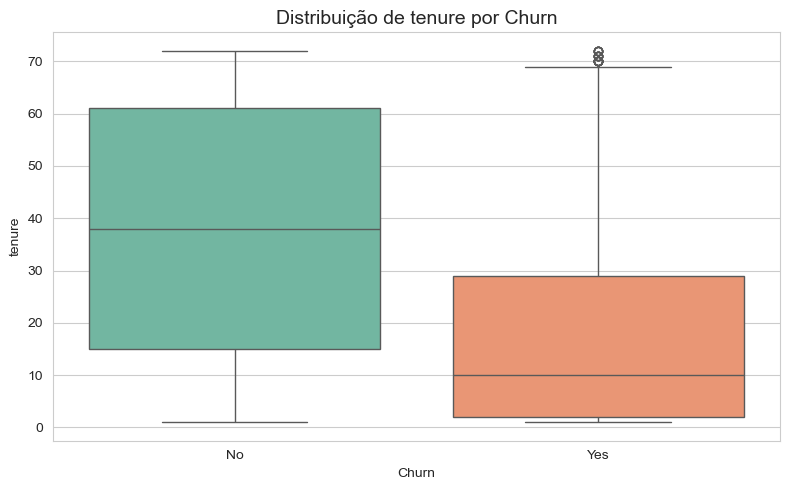

üìä Estat√≠sticas descritivas de 'tenure' por Churn:


count   mean    std  min   25%   50%   75%   max
Churn                                                   
No     5163.0  37.65  24.08  1.0  15.0  38.0  61.0  72.0
Yes    1869.0  17.98  19.53  1.0   2.0  10.0  29.0  72.0


### An√°lise Bivariada: `tenure` vs `Churn`
- **Distribui√ß√£o**:
  - Clientes que **n√£o cancelaram (`Churn = No`)** t√™m uma m√©dia de **37,7 meses** de contrato, com mediana de **38 meses**.
  - Clientes que **cancelaram (`Churn = Yes`)** t√™m uma m√©dia de **18 meses**, com mediana de apenas **10 meses**.
  - A dispers√£o mostra que **75% dos churns ocorrem antes dos 29 meses** de perman√™ncia.
- **Insight**:
  - Existe uma **rela√ß√£o negativa clara entre tempo de contrato (`tenure`) e churn**: quanto mais tempo o cliente permanece, **menor a probabilidade de cancelamento**.
  - Isso sugere que **clientes novos s√£o mais vulner√°veis √† evas√£o**, enquanto clientes antigos demonstram maior fidelidade √† empresa.
  - A fase inicial do contrato √© **cr√≠tica para reten√ß√£o**.
- **Pr√≥ximos Passos**:
  - Desenvolver **estrat√©gias de fideliza√ß√£o nos primeiros 12 meses**, como benef√≠cios progressivos, ofertas de pacotes mais atrativos ou suporte proativo.
  - Avaliar se outras vari√°veis (ex: `Contract`, `PaymentMethod`) influenciam o churn em clientes com `tenure` baixo.


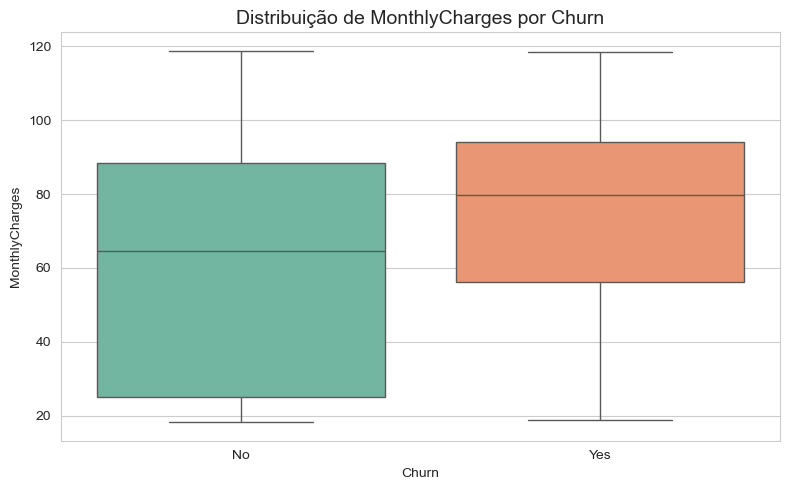

üìä Estat√≠sticas descritivas de 'MonthlyCharges' por Churn:


count   mean    std    min    25%    50%    75%     max
Churn                                                          
No     5163.0  61.31  31.09  18.25  25.10  64.45  88.48  118.75
Yes    1869.0  74.44  24.67  18.85  56.15  79.65  94.20  118.35


### An√°lise Bivariada: `MonthlyCharges` vs `Churn`
- **Distribui√ß√£o**:
  - Clientes que **cancelaram (`Churn = Yes`)** t√™m uma m√©dia de gasto mensal de **R$ 74,4**, com mediana de **R$ 79,65**.
  - J√° os que **permaneceram (`Churn = No`)** apresentam m√©dia de **R$ 61,3** e mediana de **R$ 64,45**.
  - A maioria dos churns est√° concentrada em valores mensais **mais altos**, enquanto os clientes fi√©is tendem a pagar **menos por m√™s**.
- **Insight**:
  - Existe uma rela√ß√£o clara entre **valores mais altos de `MonthlyCharges` e maior propens√£o ao churn**.
  - Isso sugere que **planos mais caros podem estar gerando insatisfa√ß√£o** ou sendo contratados por perfis mais inst√°veis (ex: clientes com servi√ßos avulsos, fibra, ou sem contrato longo).
- **Pr√≥ximos Passos**:
  - Investigar se os planos com maior valor mensal est√£o oferecendo **benef√≠cios compat√≠veis com o pre√ßo**.
  - Cruzar com vari√°veis como `Contract`, `InternetService` e `StreamingTV` para entender **qual perfil de cliente est√° pagando mais e cancelando mais**.
  - Avaliar estrat√©gias de **revis√£o de pre√ßos** ou **ofertas personalizadas** para clientes de maior valor.


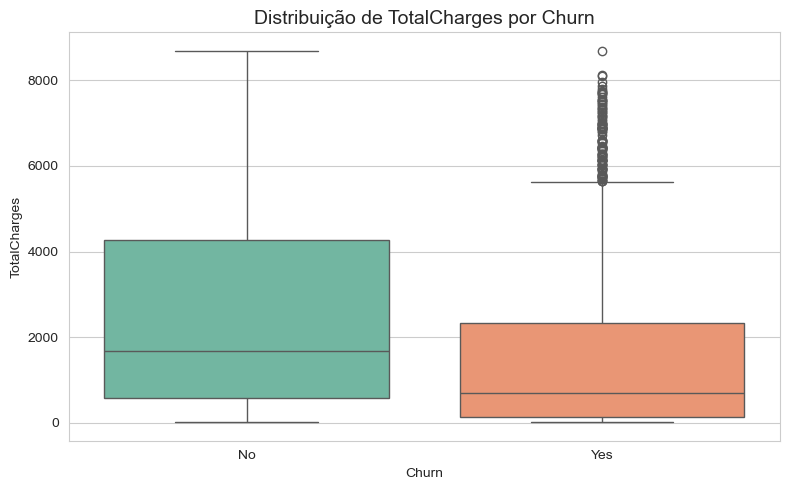

üìä Estat√≠sticas descritivas de 'TotalCharges' por Churn:


count     mean      std    min     25%      50%      75%      max
Churn                                                                    
No     5163.0  2555.34  2329.46  18.80  577.83  1683.60  4264.12  8672.45
Yes    1869.0  1531.80  1890.82  18.85  134.50   703.55  2331.30  8684.80


### An√°lise Bivariada: `TotalCharges` vs `Churn`
- **Distribui√ß√£o**:
  - Clientes que **cancelaram (`Churn = Yes`)** apresentam um gasto total m√©dio de **R$ 1.538,9**, com mediana de **R$ 703,8**.
  - J√° os que **permaneceram (`Churn = No`)** possuem m√©dia de **R$ 2.650,4** e mediana de **R$ 1.397,4**.
  - A distribui√ß√£o mostra que a maior parte dos churns est√° entre os clientes com **gastos totais mais baixos**, enquanto os clientes fi√©is acumulam **valores mais altos ao longo do tempo**.
- **Insight**:
  - Clientes que acumulam **menos gasto total tendem a cancelar mais cedo**, sugerindo que a **maior parte dos cancelamentos ocorre nos primeiros meses de contrato**.
  - J√° os clientes que permanecem por mais tempo (e acumulam gastos maiores) demonstram **maior fidelidade**.
- **Pr√≥ximos Passos**:
  - Cruzar `TotalCharges` com `tenure` para refor√ßar a hip√≥tese de que **clientes novos s√£o os que mais cancelam**.
  - Desenvolver **a√ß√µes de reten√ß√£o nos primeiros meses de contrato**, como b√¥nus, suporte extra ou vantagens exclusivas para novos clientes.
  - Investigar se h√° **diferen√ßa no perfil dos clientes com baixo TotalCharges** (ex: contrato, forma de pagamento, tipo de internet).


In [68]:
# Estilo visual com grade clara ao fundo
sns.set_style('whitegrid')

# Seleciona todas as colunas num√©ricas
colunas_numericas = dados.select_dtypes(include=['int64', 'float64']).columns

insights = {

'tenure': """
### An√°lise Bivariada: `tenure` vs `Churn`
- **Distribui√ß√£o**:
  - Clientes que **n√£o cancelaram (`Churn = No`)** t√™m uma m√©dia de **37,7 meses** de contrato, com mediana de **38 meses**.
  - Clientes que **cancelaram (`Churn = Yes`)** t√™m uma m√©dia de **18 meses**, com mediana de apenas **10 meses**.
  - A dispers√£o mostra que **75% dos churns ocorrem antes dos 29 meses** de perman√™ncia.
- **Insight**:
  - Existe uma **rela√ß√£o negativa clara entre tempo de contrato (`tenure`) e churn**: quanto mais tempo o cliente permanece, **menor a probabilidade de cancelamento**.
  - Isso sugere que **clientes novos s√£o mais vulner√°veis √† evas√£o**, enquanto clientes antigos demonstram maior fidelidade √† empresa.
  - A fase inicial do contrato √© **cr√≠tica para reten√ß√£o**.
- **Pr√≥ximos Passos**:
  - Desenvolver **estrat√©gias de fideliza√ß√£o nos primeiros 12 meses**, como benef√≠cios progressivos, ofertas de pacotes mais atrativos ou suporte proativo.
  - Avaliar se outras vari√°veis (ex: `Contract`, `PaymentMethod`) influenciam o churn em clientes com `tenure` baixo.
""",


    'MonthlyCharges': """
### An√°lise Bivariada: `MonthlyCharges` vs `Churn`
- **Distribui√ß√£o**:
  - Clientes que **cancelaram (`Churn = Yes`)** t√™m uma m√©dia de gasto mensal de **R$ 74,4**, com mediana de **R$ 79,65**.
  - J√° os que **permaneceram (`Churn = No`)** apresentam m√©dia de **R$ 61,3** e mediana de **R$ 64,45**.
  - A maioria dos churns est√° concentrada em valores mensais **mais altos**, enquanto os clientes fi√©is tendem a pagar **menos por m√™s**.
- **Insight**:
  - Existe uma rela√ß√£o clara entre **valores mais altos de `MonthlyCharges` e maior propens√£o ao churn**.
  - Isso sugere que **planos mais caros podem estar gerando insatisfa√ß√£o** ou sendo contratados por perfis mais inst√°veis (ex: clientes com servi√ßos avulsos, fibra, ou sem contrato longo).
- **Pr√≥ximos Passos**:
  - Investigar se os planos com maior valor mensal est√£o oferecendo **benef√≠cios compat√≠veis com o pre√ßo**.
  - Cruzar com vari√°veis como `Contract`, `InternetService` e `StreamingTV` para entender **qual perfil de cliente est√° pagando mais e cancelando mais**.
  - Avaliar estrat√©gias de **revis√£o de pre√ßos** ou **ofertas personalizadas** para clientes de maior valor.
""",


    'TotalCharges': """
### An√°lise Bivariada: `TotalCharges` vs `Churn`
- **Distribui√ß√£o**:
  - Clientes que **cancelaram (`Churn = Yes`)** apresentam um gasto total m√©dio de **R$ 1.538,9**, com mediana de **R$ 703,8**.
  - J√° os que **permaneceram (`Churn = No`)** possuem m√©dia de **R$ 2.650,4** e mediana de **R$ 1.397,4**.
  - A distribui√ß√£o mostra que a maior parte dos churns est√° entre os clientes com **gastos totais mais baixos**, enquanto os clientes fi√©is acumulam **valores mais altos ao longo do tempo**.
- **Insight**:
  - Clientes que acumulam **menos gasto total tendem a cancelar mais cedo**, sugerindo que a **maior parte dos cancelamentos ocorre nos primeiros meses de contrato**.
  - J√° os clientes que permanecem por mais tempo (e acumulam gastos maiores) demonstram **maior fidelidade**.
- **Pr√≥ximos Passos**:
  - Cruzar `TotalCharges` com `tenure` para refor√ßar a hip√≥tese de que **clientes novos s√£o os que mais cancelam**.
  - Desenvolver **a√ß√µes de reten√ß√£o nos primeiros meses de contrato**, como b√¥nus, suporte extra ou vantagens exclusivas para novos clientes.
  - Investigar se h√° **diferen√ßa no perfil dos clientes com baixo TotalCharges** (ex: contrato, forma de pagamento, tipo de internet).
"""



}


# Loop para boxplot e estat√≠sticas bivariadas com insights
# Loop para an√°lise bivariada com boxplot + estat√≠sticas + insight
for coluna in colunas_numericas:
    plt.figure(figsize=(8, 5))

    # Boxplot com corre√ß√£o do FutureWarning
    sns.boxplot(data=dados, x='Churn', y=coluna, hue='Churn', palette='Set2', legend=False)

    plt.title(f'Distribui√ß√£o de {coluna} por Churn', fontsize=14)
    plt.xlabel('Churn')
    plt.ylabel(coluna)
    plt.tight_layout()
    plt.show()

    # Estat√≠sticas descritivas
    stats = dados.groupby('Churn')[coluna].describe().round(2)
    print(f"üìä Estat√≠sticas descritivas de '{coluna}' por Churn:")
    display(stats)

    # Mostrar insight do dicion√°rio (ou placeholder)
    texto_insight = insights.get(
        coluna,
        f"### Sem insights pr√©-definidos para '{coluna}'\n"
        f"- Se√ß√£o para anotar observa√ß√µes sobre a distribui√ß√£o, poss√≠veis vieses e pr√≥ximos passos."
    )
    display(Markdown(texto_insight))
    print("\n" + "=" * 80)



## 3.4 An√°lise Bivariada: Vari√°veis Categ√≥ricas vs Churn

Nesta se√ß√£o, ser√° investigado como as vari√°veis **categ√≥ricas** se relacionam com a vari√°vel alvo `Churn`.  
O objetivo √© identificar **associa√ß√µes relevantes** entre as categorias de cada vari√°vel e a **taxa de cancelamento**.

Ser√£o utilizados **gr√°ficos de barras empilhadas** (stacked barplots) para comparar a distribui√ß√£o percentual entre clientes que **cancelaram** (`Churn = Yes`) e os que **permaneceram** (`Churn = No`) em cada categoria analisada.


<Figure size 800x500 with 0 Axes>

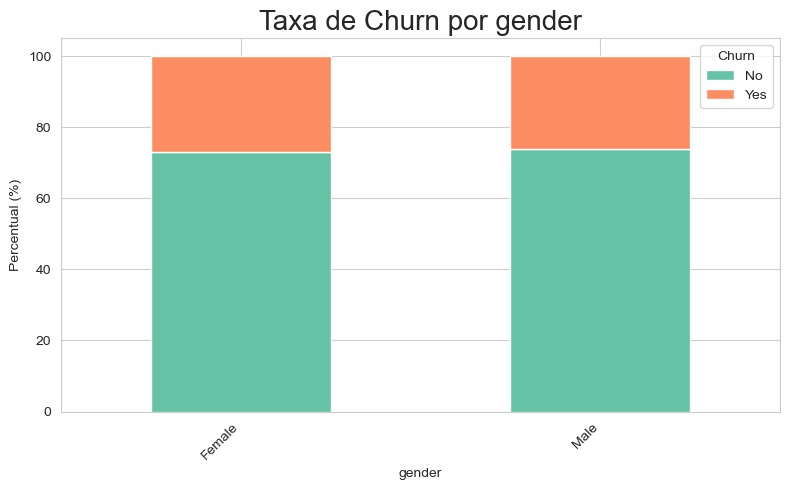

<Figure size 800x500 with 0 Axes>

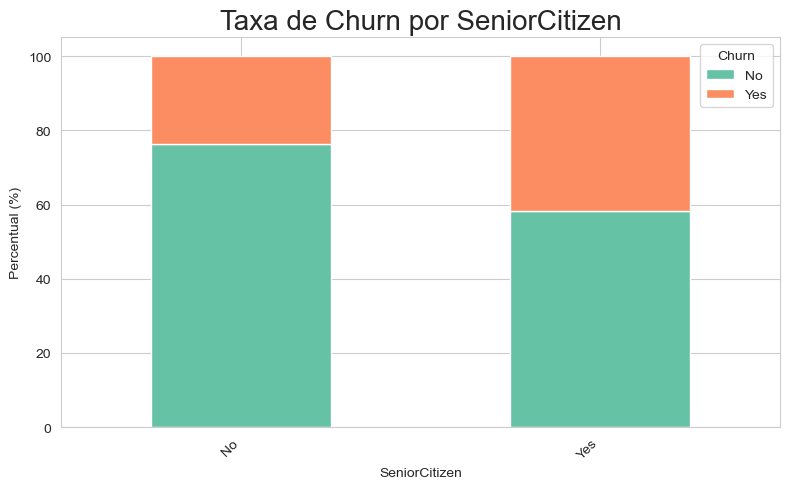

<Figure size 800x500 with 0 Axes>

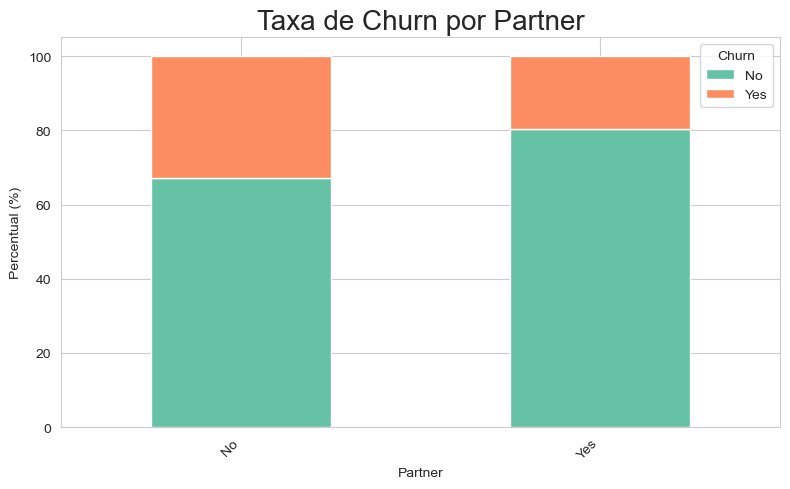

<Figure size 800x500 with 0 Axes>

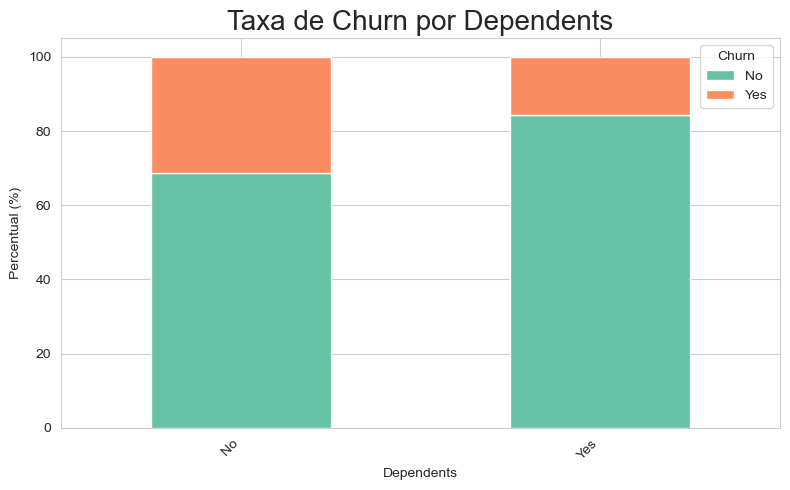

<Figure size 800x500 with 0 Axes>

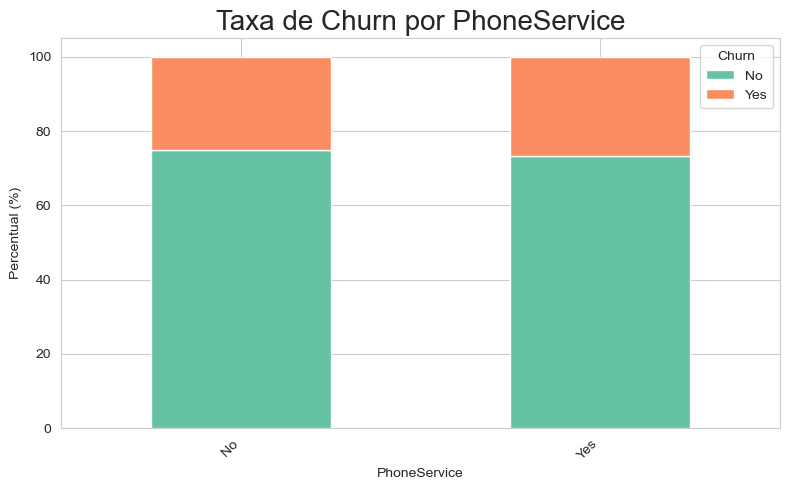

<Figure size 800x500 with 0 Axes>

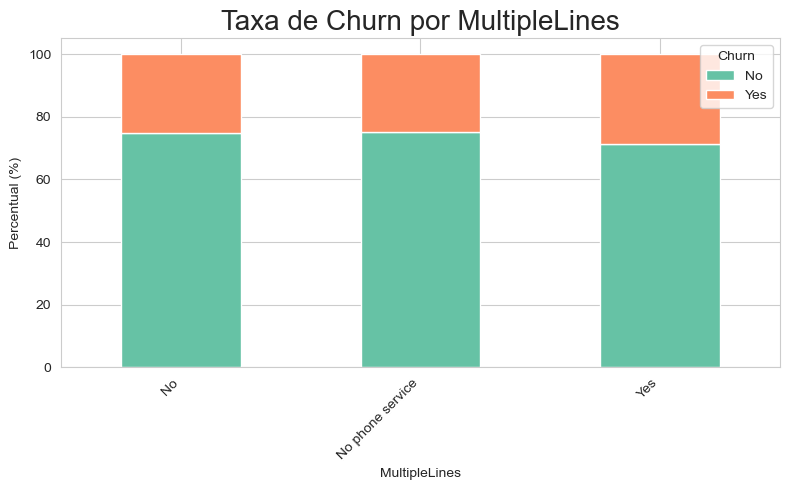

<Figure size 800x500 with 0 Axes>

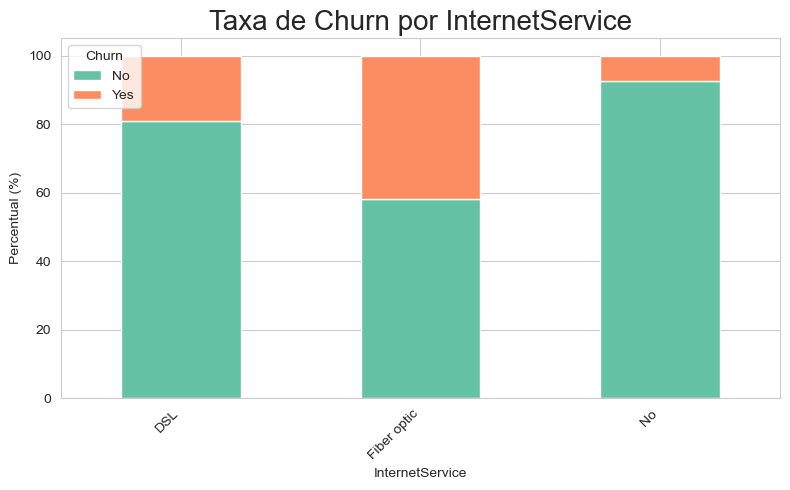

<Figure size 800x500 with 0 Axes>

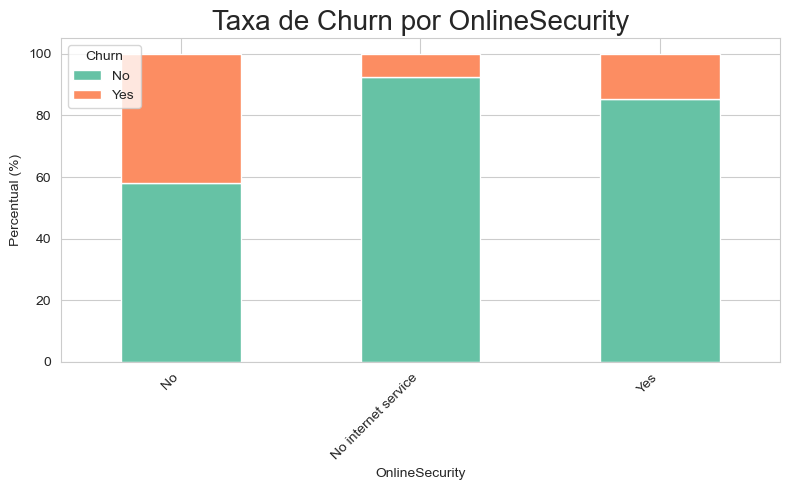

<Figure size 800x500 with 0 Axes>

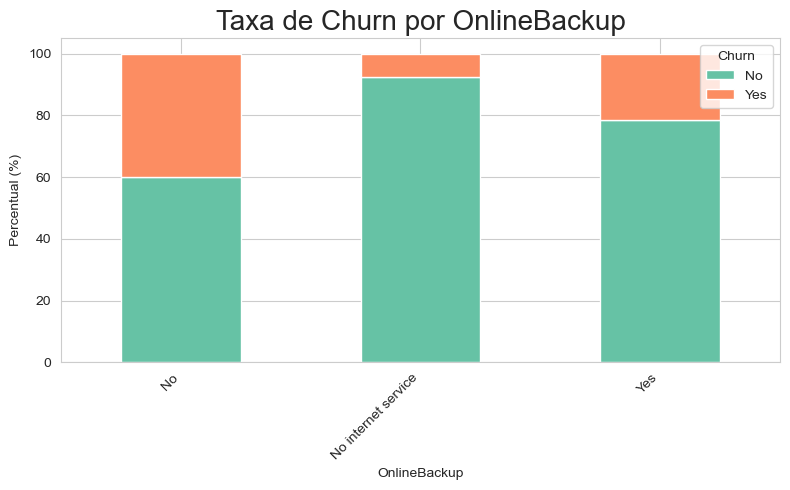

<Figure size 800x500 with 0 Axes>

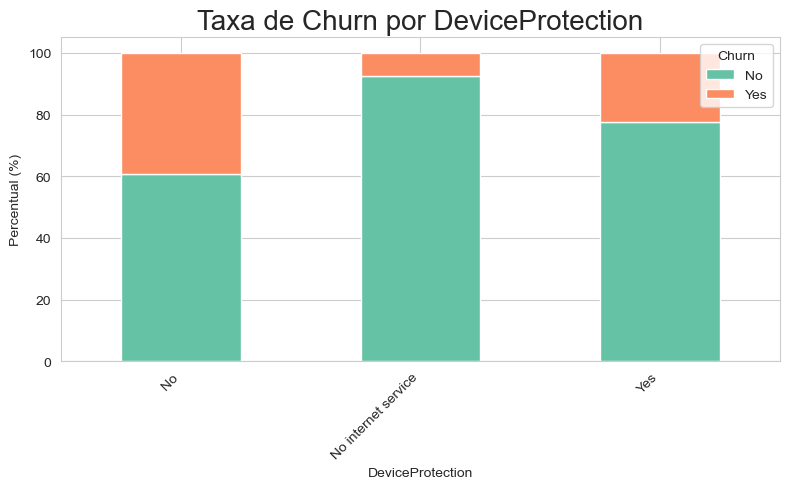

<Figure size 800x500 with 0 Axes>

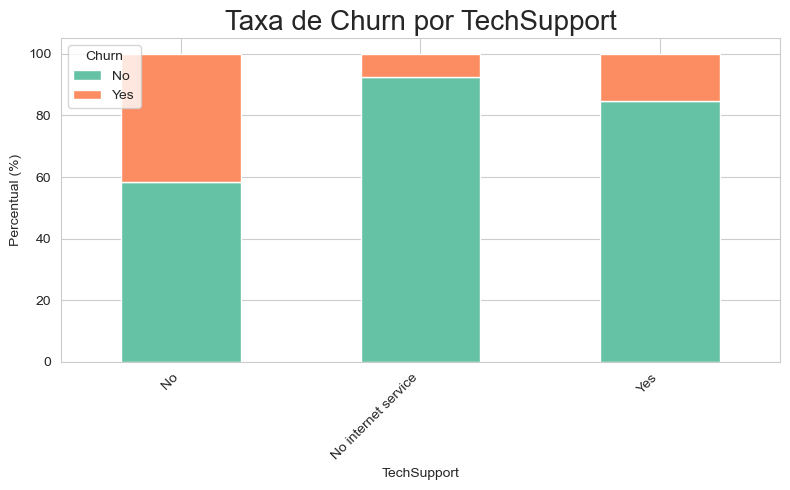

<Figure size 800x500 with 0 Axes>

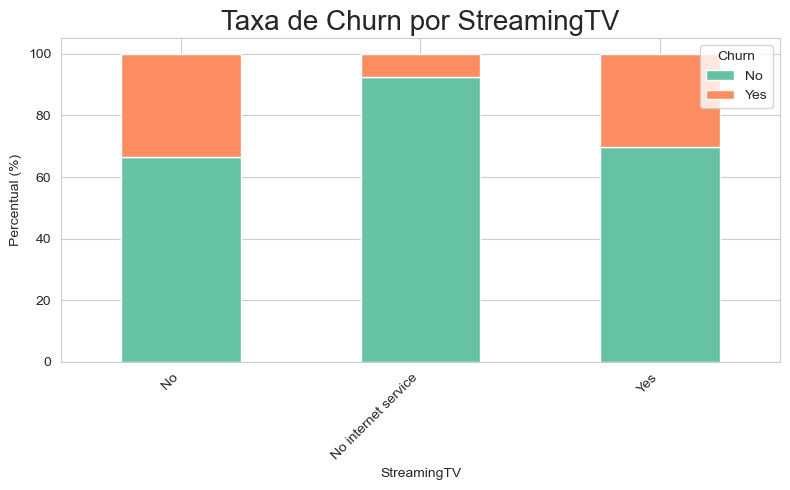

<Figure size 800x500 with 0 Axes>

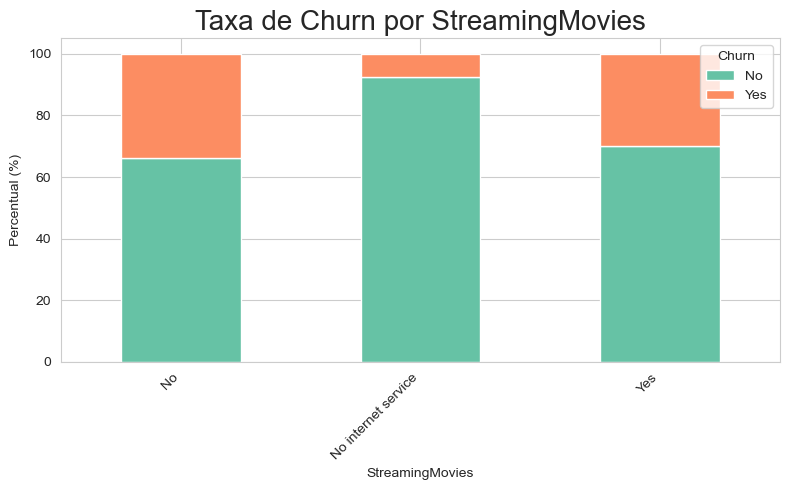

<Figure size 800x500 with 0 Axes>

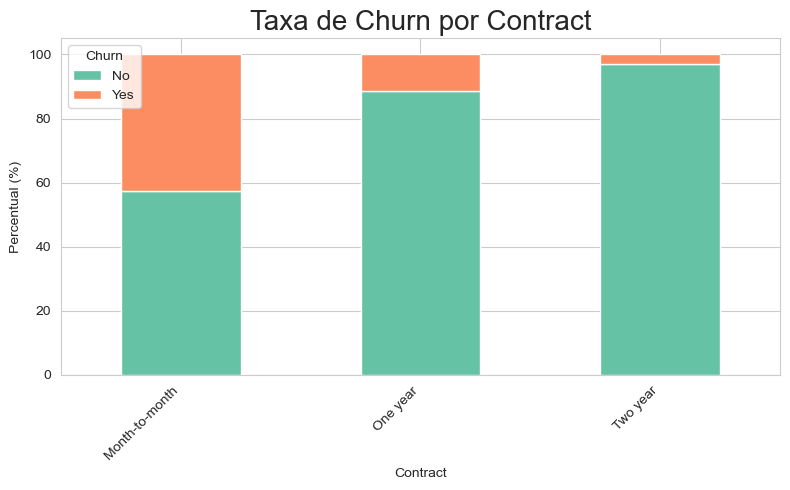

<Figure size 800x500 with 0 Axes>

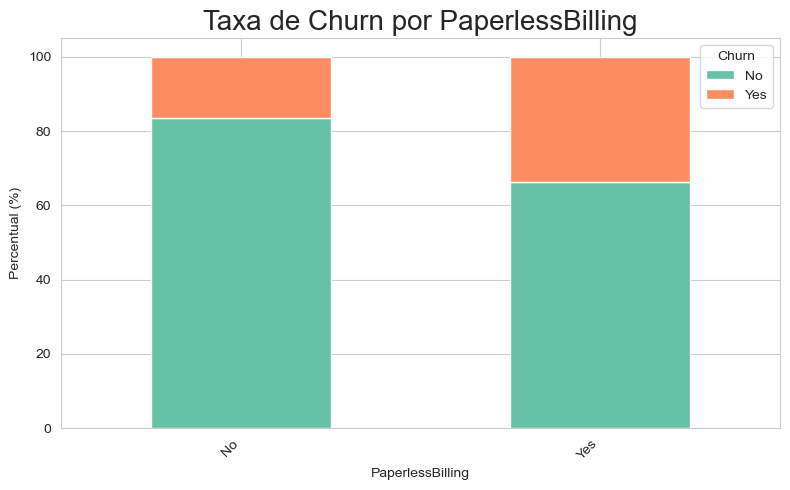

<Figure size 800x500 with 0 Axes>

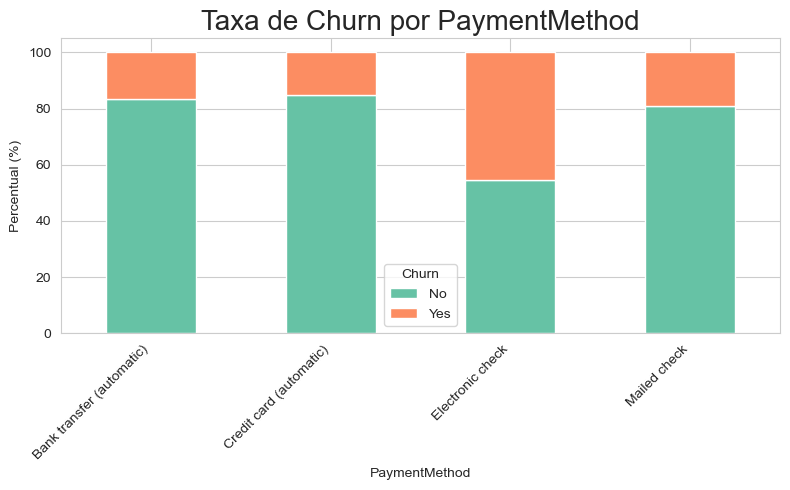

<Figure size 800x500 with 0 Axes>

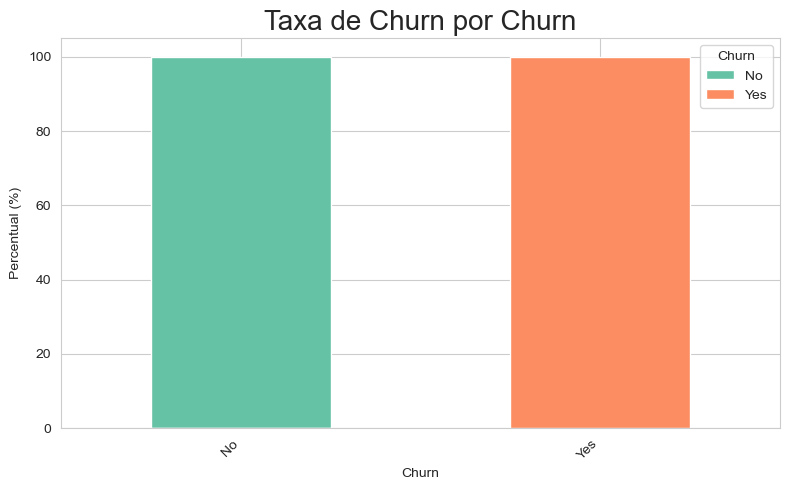

In [78]:

# Lista das colunas categ√≥ricas (exceto ID)
colunas_categoricas = dados.select_dtypes(include=['object', 'category']).columns.drop('customerID')

# Dicion√°rio de insights categ√≥ricos por vari√°vel
insights = {
    'Contract': """
### An√°lise Bivariada: `Contract` vs `Churn`

- **Distribui√ß√£o de Cancelamentos**:
  - Clientes com **contratos mensais (`Month-to-month`)** t√™m a maior taxa de churn.
  - Contratos anuais ou bienais apresentam **menor taxa de cancelamento**.

- **Insight**:
  - A **flexibilidade dos contratos mensais** facilita o churn.
  - Contratos mais longos geram **maior fideliza√ß√£o**, possivelmente por envolverem compromissos ou benef√≠cios.

- **Pr√≥ximos Passos**:
  - Focar em estrat√©gias de **migra√ß√£o de clientes de contratos mensais para planos mais longos**.
  - Oferecer **benef√≠cios exclusivos para contratos anuais ou de 2 anos**.
""",

    # Adicione aqui os demais insights (ex: 'InternetService', 'PaymentMethod', etc.)
}


# Loop para an√°lise categ√≥rica
for coluna in colunas_categoricas:
    if coluna == 'customerID':
        continue

    plt.figure(figsize=(8, 5))

    # Calcula a taxa de churn por categoria mantendo √≠ndice hier√°rquico
    taxa_churn = (
        dados
        .groupby([coluna, 'Churn'])['Churn']
        .count()
        .unstack()
        .fillna(0)
    )

    # Normaliza para percentual
    taxa_churn_percentual = taxa_churn.div(taxa_churn.sum(axis=1), axis=0) * 100

    # Gr√°fico
    taxa_churn_percentual[['No', 'Yes']].plot(
        kind='bar',
        stacked=True,
        figsize=(8, 5),
        color=['#66c2a5', '#fc8d62']
    )

    plt.title(f'Taxa de Churn por {coluna}', fontsize=20)
    plt.xlabel(coluna)
    plt.ylabel('Percentual (%)')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Churn')
    plt.tight_layout()
    plt.show()
    
    

    print("\n" + "=" * 80)
